## A notebook to create a bar graph of CTs inside AS

## Install and import libraries

In [1]:
%pip install pandas seaborn numpy requests

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import textwrap
import requests
from  io import StringIO

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load data

In [2]:
url = "https://grlc.io/api-git/hubmapconsortium/ccf-grlc/subdir/hra-pop/cell_types_in_anatomical_structurescts_per_as"

headers = {
  'Accept' :'text/csv'
  }

data = requests.get(url=url, headers=headers).text
df = pd.read_csv(StringIO(data))

df

organ                                             as  \
0     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
1     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
2     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
3     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
4     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
...               ...                                            ...   
7846             lung            http://purl.org/sig/ont/fma/fma7508   
7847             lung            http://purl.org/sig/ont/fma/fma7508   
7848             lung            http://purl.org/sig/ont/fma/fma7508   
7849             lung            http://purl.org/sig/ont/fma/fma7508   
7850             lung            http://purl.org/sig/ont/fma/fma7508   

                                     as_label     sex           tool  \
0                                      caecum  Female     celltypist   
1                                      caecum  Female     celltypist   
2                                      caecum  Female     celltypist   
3                                      caecum  Female     celltypist   
4                                      caecum  Female     celltypist   
...                                       ...     ...            ...   
7846  Left posterior basal segmental bronchus    Male  sc_proteomics   
7847  Left posterior basal segmental bronchus    Male  sc_proteomics   
7848  Left posterior basal segmental bronchus    Male  sc_proteomics   
7849  Left posterior basal segmental bronchus    Male  sc_proteomics   
7850  Left posterior basal segmental bronchus    Male  sc_proteomics   

                modality                                            cell_id  \
0     sc_transcriptomics         https://purl.org/ccf/ASCTB-TEMP_smc-plpp2-   
1     sc_transcriptomics  https://purl.org/ccf/ASCTB-TEMP_cycling-plasma...   
2     sc_transcriptomics  https://purl.org/ccf/ASCTB-TEMP_mesoderm-1-hand1-   
3     sc_transcriptomics         https://purl.org/ccf/ASCTB-TEMP_colonocyte   
4     sc_transcriptomics        https://purl.org/ccf/ASCTB-TEMP_goblet-cell   
...                  ...                                                ...   
7846       sc_proteomics          https://purl.org/ccf/ASCTB-TEMP_mast-cell   
7847       sc_proteomics         https://purl.org/ccf/ASCTB-TEMP_cd8-t-cell   
7848       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...   
7849       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...   
7850       sc_proteomics             https://purl.org/ccf/ASCTB-TEMP_b-cell   

                                         cell_label  cell_count  \
0                                      SMC (PLPP2+)      92.848   
1                               Cycling plasma cell      63.448   
2                               Mesoderm 1 (HAND1+)      57.400   
3                                        Colonocyte      53.928   
4                                       Goblet cell      49.280   
...                                             ...         ...   
7846                                      Mast Cell   15322.464   
7847                                    CD8+ T Cell    3691.176   
7848  Lymphatic Endothelial (and some immune cells)    1753.956   
7849                          Basal Epithelial Cell     970.104   
7850                                         B Cell     462.144   

      cell_percentage  dataset_count  
0            0.114140              3  
1            0.077998              3  
2            0.070563              3  
3            0.066295              3  
4            0.060581              3  
...               ...            ...  
7846         0.024702              1  
7847         0.005951              1  
7848         0.002828              1  
7849         0.001564              1  
7850         0.000745              1  

[7851 rows x 11 columns]

## Global settings

In [3]:
hra_pop_version = 'v0.11.1'

output_folder = 'output/ctBar3dAs'

# adjust vis
# plt.rcParams['figure.figsize'] = (10, 2.5)

# Set global font sizes using rcParams
plt.rcParams.update({
    "axes.titlesize": 20,    # Font size for plot titles
    "axes.labelsize": 13,    # Font size for x and y labels
    "xtick.labelsize": 12,   # Font size for x-axis tick labels
    "ytick.labelsize": 12,  # Font size for y-axis tick labels
    "legend.fontsize": 13,
    "legend.title_fontsize": 15
})

## Preprocess

In [4]:
# walk up CTs
csv_response =requests.get('https://grlc.io/api-git/hubmapconsortium/ccf-grlc/subdir/hra-pop/cell-types-level-mapping', headers={'accept': 'text/csv'}).text
look_up = pd.read_csv(StringIO(csv_response))
look_up

cell_label  \
0                         hematopoietic stem cell   
1                                      fibroblast   
2                                 epithelial cell   
3                   blood vessel endothelial cell   
4                                mesothelial cell   
..                                            ...   
193  metallothionein-positive alveolar macrophage   
194                  lung interstitial macrophage   
195                             deuterosomal cell   
196                 lung migratory dendritic cell   
197                   respiratory suprabasal cell   

                                       cell_id  \
0    http://purl.obolibrary.org/obo/CL_0000037   
1    http://purl.obolibrary.org/obo/CL_0000057   
2    http://purl.obolibrary.org/obo/CL_0000066   
3    http://purl.obolibrary.org/obo/CL_0000071   
4    http://purl.obolibrary.org/obo/CL_0000077   
..                                         ...   
193  http://purl.obolibrary.org/obo/CL_4033042   
194  http://purl.obolibrary.org/obo/CL_4033043   
195  http://purl.obolibrary.org/obo/CL_4033044   
196  http://purl.obolibrary.org/obo/CL_4033045   
197  http://purl.obolibrary.org/obo/CL_4033048   

                               level_1_cell_id level_1_cell_label  
0    http://purl.obolibrary.org/obo/CL_0000034          stem cell  
1    http://purl.obolibrary.org/obo/CL_0000057         fibroblast  
2    http://purl.obolibrary.org/obo/CL_0000066    epithelial cell  
3    http://purl.obolibrary.org/obo/CL_0000000       unknown cell  
4    http://purl.obolibrary.org/obo/CL_0000066    epithelial cell  
..                                         ...                ...  
193  http://purl.obolibrary.org/obo/CL_0000235         macrophage  
194  http://purl.obolibrary.org/obo/CL_0000235         macrophage  
195  http://purl.obolibrary.org/obo/CL_0000066    epithelial cell  
196  http://purl.obolibrary.org/obo/CL_0000451     dendritic cell  
197  http://purl.obolibrary.org/obo/CL_0000066    epithelial cell  

[198 rows x 4 columns]

In [5]:
df_temp = df
df_temp

organ                                             as  \
0     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
1     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
2     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
3     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
4     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
...               ...                                            ...   
7846             lung            http://purl.org/sig/ont/fma/fma7508   
7847             lung            http://purl.org/sig/ont/fma/fma7508   
7848             lung            http://purl.org/sig/ont/fma/fma7508   
7849             lung            http://purl.org/sig/ont/fma/fma7508   
7850             lung            http://purl.org/sig/ont/fma/fma7508   

                                     as_label     sex           tool  \
0                                      caecum  Female     celltypist   
1                                      caecum  Female     celltypist   
2                                      caecum  Female     celltypist   
3                                      caecum  Female     celltypist   
4                                      caecum  Female     celltypist   
...                                       ...     ...            ...   
7846  Left posterior basal segmental bronchus    Male  sc_proteomics   
7847  Left posterior basal segmental bronchus    Male  sc_proteomics   
7848  Left posterior basal segmental bronchus    Male  sc_proteomics   
7849  Left posterior basal segmental bronchus    Male  sc_proteomics   
7850  Left posterior basal segmental bronchus    Male  sc_proteomics   

                modality                                            cell_id  \
0     sc_transcriptomics         https://purl.org/ccf/ASCTB-TEMP_smc-plpp2-   
1     sc_transcriptomics  https://purl.org/ccf/ASCTB-TEMP_cycling-plasma...   
2     sc_transcriptomics  https://purl.org/ccf/ASCTB-TEMP_mesoderm-1-hand1-   
3     sc_transcriptomics         https://purl.org/ccf/ASCTB-TEMP_colonocyte   
4     sc_transcriptomics        https://purl.org/ccf/ASCTB-TEMP_goblet-cell   
...                  ...                                                ...   
7846       sc_proteomics          https://purl.org/ccf/ASCTB-TEMP_mast-cell   
7847       sc_proteomics         https://purl.org/ccf/ASCTB-TEMP_cd8-t-cell   
7848       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...   
7849       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...   
7850       sc_proteomics             https://purl.org/ccf/ASCTB-TEMP_b-cell   

                                         cell_label  cell_count  \
0                                      SMC (PLPP2+)      92.848   
1                               Cycling plasma cell      63.448   
2                               Mesoderm 1 (HAND1+)      57.400   
3                                        Colonocyte      53.928   
4                                       Goblet cell      49.280   
...                                             ...         ...   
7846                                      Mast Cell   15322.464   
7847                                    CD8+ T Cell    3691.176   
7848  Lymphatic Endothelial (and some immune cells)    1753.956   
7849                          Basal Epithelial Cell     970.104   
7850                                         B Cell     462.144   

      cell_percentage  dataset_count  
0            0.114140              3  
1            0.077998              3  
2            0.070563              3  
3            0.066295              3  
4            0.060581              3  
...               ...            ...  
7846         0.024702              1  
7847         0.005951              1  
7848         0.002828              1  
7849         0.001564              1  
7850         0.000745              1  

[7851 rows x 11 columns]

In [6]:
# Merge look-up df with df
df_temp = df.merge(
    look_up[['cell_id','level_1_cell_id','level_1_cell_label']],
    left_on='cell_id',  # Column in main df
    right_on='cell_id',  # Column in lookup df
    how='left'      # Keep all rows from main df
)

# handle missing values
df_temp['level_1_cell_id'] = df_temp['level_1_cell_id'].fillna('Unknown Cell')
df_temp['level_1_cell_label'] = df_temp['level_1_cell_label'].fillna('Unknown Cell')

df_temp

organ                                             as  \
0     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
1     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
2     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
3     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
4     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
...               ...                                            ...   
7906             lung            http://purl.org/sig/ont/fma/fma7508   
7907             lung            http://purl.org/sig/ont/fma/fma7508   
7908             lung            http://purl.org/sig/ont/fma/fma7508   
7909             lung            http://purl.org/sig/ont/fma/fma7508   
7910             lung            http://purl.org/sig/ont/fma/fma7508   

                                     as_label     sex           tool  \
0                                      caecum  Female     celltypist   
1                                      caecum  Female     celltypist   
2                                      caecum  Female     celltypist   
3                                      caecum  Female     celltypist   
4                                      caecum  Female     celltypist   
...                                       ...     ...            ...   
7906  Left posterior basal segmental bronchus    Male  sc_proteomics   
7907  Left posterior basal segmental bronchus    Male  sc_proteomics   
7908  Left posterior basal segmental bronchus    Male  sc_proteomics   
7909  Left posterior basal segmental bronchus    Male  sc_proteomics   
7910  Left posterior basal segmental bronchus    Male  sc_proteomics   

                modality                                            cell_id  \
0     sc_transcriptomics         https://purl.org/ccf/ASCTB-TEMP_smc-plpp2-   
1     sc_transcriptomics  https://purl.org/ccf/ASCTB-TEMP_cycling-plasma...   
2     sc_transcriptomics  https://purl.org/ccf/ASCTB-TEMP_mesoderm-1-hand1-   
3     sc_transcriptomics         https://purl.org/ccf/ASCTB-TEMP_colonocyte   
4     sc_transcriptomics        https://purl.org/ccf/ASCTB-TEMP_goblet-cell   
...                  ...                                                ...   
7906       sc_proteomics          https://purl.org/ccf/ASCTB-TEMP_mast-cell   
7907       sc_proteomics         https://purl.org/ccf/ASCTB-TEMP_cd8-t-cell   
7908       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...   
7909       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...   
7910       sc_proteomics             https://purl.org/ccf/ASCTB-TEMP_b-cell   

                                         cell_label  cell_count  \
0                                      SMC (PLPP2+)      92.848   
1                               Cycling plasma cell      63.448   
2                               Mesoderm 1 (HAND1+)      57.400   
3                                        Colonocyte      53.928   
4                                       Goblet cell      49.280   
...                                             ...         ...   
7906                                      Mast Cell   15322.464   
7907                                    CD8+ T Cell    3691.176   
7908  Lymphatic Endothelial (and some immune cells)    1753.956   
7909                          Basal Epithelial Cell     970.104   
7910                                         B Cell     462.144   

      cell_percentage  dataset_count level_1_cell_id level_1_cell_label  
0            0.114140              3    Unknown Cell       Unknown Cell  
1            0.077998              3    Unknown Cell       Unknown Cell  
2            0.070563              3    Unknown Cell       Unknown Cell  
3            0.066295              3    Unknown Cell       Unknown Cell  
4            0.060581              3    Unknown Cell       Unknown Cell  
...               ...            ...             ...                ...  
7906         0

In [7]:
df = df_temp

df

organ                                             as  \
0     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
1     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
2     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
3     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
4     large intestine  http://purl.obolibrary.org/obo/UBERON_0001153   
...               ...                                            ...   
7906             lung            http://purl.org/sig/ont/fma/fma7508   
7907             lung            http://purl.org/sig/ont/fma/fma7508   
7908             lung            http://purl.org/sig/ont/fma/fma7508   
7909             lung            http://purl.org/sig/ont/fma/fma7508   
7910             lung            http://purl.org/sig/ont/fma/fma7508   

                                     as_label     sex           tool  \
0                                      caecum  Female     celltypist   
1                                      caecum  Female     celltypist   
2                                      caecum  Female     celltypist   
3                                      caecum  Female     celltypist   
4                                      caecum  Female     celltypist   
...                                       ...     ...            ...   
7906  Left posterior basal segmental bronchus    Male  sc_proteomics   
7907  Left posterior basal segmental bronchus    Male  sc_proteomics   
7908  Left posterior basal segmental bronchus    Male  sc_proteomics   
7909  Left posterior basal segmental bronchus    Male  sc_proteomics   
7910  Left posterior basal segmental bronchus    Male  sc_proteomics   

                modality                                            cell_id  \
0     sc_transcriptomics         https://purl.org/ccf/ASCTB-TEMP_smc-plpp2-   
1     sc_transcriptomics  https://purl.org/ccf/ASCTB-TEMP_cycling-plasma...   
2     sc_transcriptomics  https://purl.org/ccf/ASCTB-TEMP_mesoderm-1-hand1-   
3     sc_transcriptomics         https://purl.org/ccf/ASCTB-TEMP_colonocyte   
4     sc_transcriptomics        https://purl.org/ccf/ASCTB-TEMP_goblet-cell   
...                  ...                                                ...   
7906       sc_proteomics          https://purl.org/ccf/ASCTB-TEMP_mast-cell   
7907       sc_proteomics         https://purl.org/ccf/ASCTB-TEMP_cd8-t-cell   
7908       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...   
7909       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...   
7910       sc_proteomics             https://purl.org/ccf/ASCTB-TEMP_b-cell   

                                         cell_label  cell_count  \
0                                      SMC (PLPP2+)      92.848   
1                               Cycling plasma cell      63.448   
2                               Mesoderm 1 (HAND1+)      57.400   
3                                        Colonocyte      53.928   
4                                       Goblet cell      49.280   
...                                             ...         ...   
7906                                      Mast Cell   15322.464   
7907                                    CD8+ T Cell    3691.176   
7908  Lymphatic Endothelial (and some immune cells)    1753.956   
7909                          Basal Epithelial Cell     970.104   
7910                                         B Cell     462.144   

      cell_percentage  dataset_count level_1_cell_id level_1_cell_label  
0            0.114140              3    Unknown Cell       Unknown Cell  
1            0.077998              3    Unknown Cell       Unknown Cell  
2            0.070563              3    Unknown Cell       Unknown Cell  
3            0.066295              3    Unknown Cell       Unknown Cell  
4            0.060581              3    Unknown Cell       Unknown Cell  
...               ...            ...             ...                ...  
7906         0

In [8]:
# filter by tool (azimuth, then celltypist, then popv)
# Function to determine if a row should be kept based on conditions
def filter_rows(df):
    # Step 1: Group by `sex`, `as_label`, and `modality`
    groups = df.groupby(['organ','sex', 'as_label', 'modality'])

    # Step 2: Initialize a list to store the rows to keep
    rows_to_keep = []

    # Step 3: Loop through each group
    for _, group in groups:
        # If 'sc_proteomics' exists in the group, always those rows but do not discard others
        if 'sc_proteomics' in group['tool'].values:
          rows_to_keep.append(group[group['tool'] == 'sc_proteomics'])
      
        # If 'azimuth' exists in the group, keep only those rows
        if 'azimuth' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'azimuth'])
        # If no 'azimuth' but 'cell_typist' exists, keep 'cell_typist'
        elif 'celltypist' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'celltypist'])
        # If neither 'azimuth' nor 'cell_typist' exist, keep 'popv'
        elif 'popv' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'popv'])

    # Combine all the rows to keep
    df_filtered = pd.concat(rows_to_keep)
    return df_filtered


# Apply the filtering function
df_filtered = filter_rows(df)

# Display the filtered DataFrame
df_filtered

organ                                             as  \
2068      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
2070      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
2072      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
2074      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
2076      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
...               ...                                            ...   
4270  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
4271  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
4272  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
4273  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
4274  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   

                        as_label     sex     tool            modality  \
2068             hilum of kidney  Female  azimuth  sc_transcriptomics   
2070             hilum of kidney  Female  azimuth  sc_transcriptomics   
2072             hilum of kidney  Female  azimuth  sc_transcriptomics   
2074             hilum of kidney  Female  azimuth  sc_transcriptomics   
2076             hilum of kidney  Female  azimuth  sc_transcriptomics   
...                          ...     ...      ...                 ...   
4270  trigone of urinary bladder    Male     popv  sc_transcriptomics   
4271  trigone of urinary bladder    Male     popv  sc_transcriptomics   
4272  trigone of urinary bladder    Male     popv  sc_transcriptomics   
4273  trigone of urinary bladder    Male     popv  sc_transcriptomics   
4274  trigone of urinary bladder    Male     popv  sc_transcriptomics   

                                        cell_id  \
2068  http://purl.obolibrary.org/obo/CL_4030022   
2070  http://purl.obolibrary.org/obo/CL_1000718   
2072  http://purl.obolibrary.org/obo/CL_1000692   
2074  http://purl.obolibrary.org/obo/CL_1000597   
2076  http://purl.obolibrary.org/obo/CL_1000768   
...                                         ...   
4270  http://purl.obolibrary.org/obo/CL_0000814   
4271  http://purl.obolibrary.org/obo/CL_0002138   
4272  http://purl.obolibrary.org/obo/CL_0000236   
4273  http://purl.obolibrary.org/obo/CL_0000084   
4274  http://purl.obolibrary.org/obo/CL_0000786   

                                cell_label  cell_count  cell_percentage  \
2068                  Medullary Fibroblast    1832.421         0.274784   
2070       Inner Medullary Collecting Duct    1146.533         0.171930   
2072                            Fibroblast     876.037         0.131368   
2074              Papillary Tip Epithelial     749.843         0.112444   
2076                     Connecting Tubule     315.994         0.047385   
...                                    ...         ...              ...   
4270                      mature NK T cell      53.168         0.001612   
4271  endothelial cell of lymphatic vessel      52.639         0.001596   
4272                                B cell      20.586         0.000624   
4273                                T cell      10.935         0.000332   
4274                           plasma cell       1.699         0.000052   

      dataset_count                            level_1_cell_id  \
2068              2  http://purl.obolibrary.org/obo/CL_0000057   
2070              2  http://purl.obolibrary.org/obo/CL_0000066   
2072              2  http://purl.obolibrary.org/obo/CL_0000057   
2074              2  http://purl.obolibrary.org/obo/CL_0000000   
2076              2  http://purl.obolibrary.org/obo/CL_0000066   
...             ...                                        ...   
4270              4  http://purl.obolibrary.org/obo/CL_0000084   
4271              4  http://purl.obolibrary.org/obo/CL_0000000   
4272              4  http://purl.obolibrary.org/obo/CL_0000236   
4273              4  http://purl.obolibrary.org/obo/CL_0000084   
4274              4  http://purl.o

In [9]:
# get unique combinations of organ, sex, AS, tool, and modality
unique_combinations = df_filtered[['organ','sex', 'as_label','tool', 'modality']].drop_duplicates().reset_index().drop(columns=['index'])
unique_combinations

organ     sex                    as_label           tool  \
0        Left kidney  Female             hilum of kidney        azimuth   
1        Left kidney  Female              kidney capsule        azimuth   
2        Left kidney  Female      outer cortex of kidney        azimuth   
3        Left kidney  Female                renal column        azimuth   
4        Left kidney  Female               renal papilla        azimuth   
..               ...     ...                         ...            ...   
122           spleen    Male             hilum of spleen           popv   
123           spleen    Male     renal surface of spleen  sc_proteomics   
124  urinary bladder  Female   fundus of urinary bladder           popv   
125  urinary bladder    Male   fundus of urinary bladder           popv   
126  urinary bladder    Male  trigone of urinary bladder           popv   

               modality  
0    sc_transcriptomics  
1    sc_transcriptomics  
2    sc_transcriptomics  
3    sc_transcriptomics  
4    sc_transcriptomics  
..                  ...  
122  sc_transcriptomics  
123       sc_proteomics  
124  sc_transcriptomics  
125  sc_transcriptomics  
126  sc_transcriptomics  

[127 rows x 5 columns]

## Visualize (single vis)

In [10]:
df_filtered

organ                                             as  \
2068      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
2070      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
2072      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
2074      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
2076      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
...               ...                                            ...   
4270  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
4271  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
4272  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
4273  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
4274  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   

                        as_label     sex     tool            modality  \
2068             hilum of kidney  Female  azimuth  sc_transcriptomics   
2070             hilum of kidney  Female  azimuth  sc_transcriptomics   
2072             hilum of kidney  Female  azimuth  sc_transcriptomics   
2074             hilum of kidney  Female  azimuth  sc_transcriptomics   
2076             hilum of kidney  Female  azimuth  sc_transcriptomics   
...                          ...     ...      ...                 ...   
4270  trigone of urinary bladder    Male     popv  sc_transcriptomics   
4271  trigone of urinary bladder    Male     popv  sc_transcriptomics   
4272  trigone of urinary bladder    Male     popv  sc_transcriptomics   
4273  trigone of urinary bladder    Male     popv  sc_transcriptomics   
4274  trigone of urinary bladder    Male     popv  sc_transcriptomics   

                                        cell_id  \
2068  http://purl.obolibrary.org/obo/CL_4030022   
2070  http://purl.obolibrary.org/obo/CL_1000718   
2072  http://purl.obolibrary.org/obo/CL_1000692   
2074  http://purl.obolibrary.org/obo/CL_1000597   
2076  http://purl.obolibrary.org/obo/CL_1000768   
...                                         ...   
4270  http://purl.obolibrary.org/obo/CL_0000814   
4271  http://purl.obolibrary.org/obo/CL_0002138   
4272  http://purl.obolibrary.org/obo/CL_0000236   
4273  http://purl.obolibrary.org/obo/CL_0000084   
4274  http://purl.obolibrary.org/obo/CL_0000786   

                                cell_label  cell_count  cell_percentage  \
2068                  Medullary Fibroblast    1832.421         0.274784   
2070       Inner Medullary Collecting Duct    1146.533         0.171930   
2072                            Fibroblast     876.037         0.131368   
2074              Papillary Tip Epithelial     749.843         0.112444   
2076                     Connecting Tubule     315.994         0.047385   
...                                    ...         ...              ...   
4270                      mature NK T cell      53.168         0.001612   
4271  endothelial cell of lymphatic vessel      52.639         0.001596   
4272                                B cell      20.586         0.000624   
4273                                T cell      10.935         0.000332   
4274                           plasma cell       1.699         0.000052   

      dataset_count                            level_1_cell_id  \
2068              2  http://purl.obolibrary.org/obo/CL_0000057   
2070              2  http://purl.obolibrary.org/obo/CL_0000066   
2072              2  http://purl.obolibrary.org/obo/CL_0000057   
2074              2  http://purl.obolibrary.org/obo/CL_0000000   
2076              2  http://purl.obolibrary.org/obo/CL_0000066   
...             ...                                        ...   
4270              4  http://purl.obolibrary.org/obo/CL_0000084   
4271              4  http://purl.obolibrary.org/obo/CL_0000000   
4272              4  http://purl.obolibrary.org/obo/CL_0000236   
4273              4  http://purl.obolibrary.org/obo/CL_0000084   
4274              4  http://purl.o

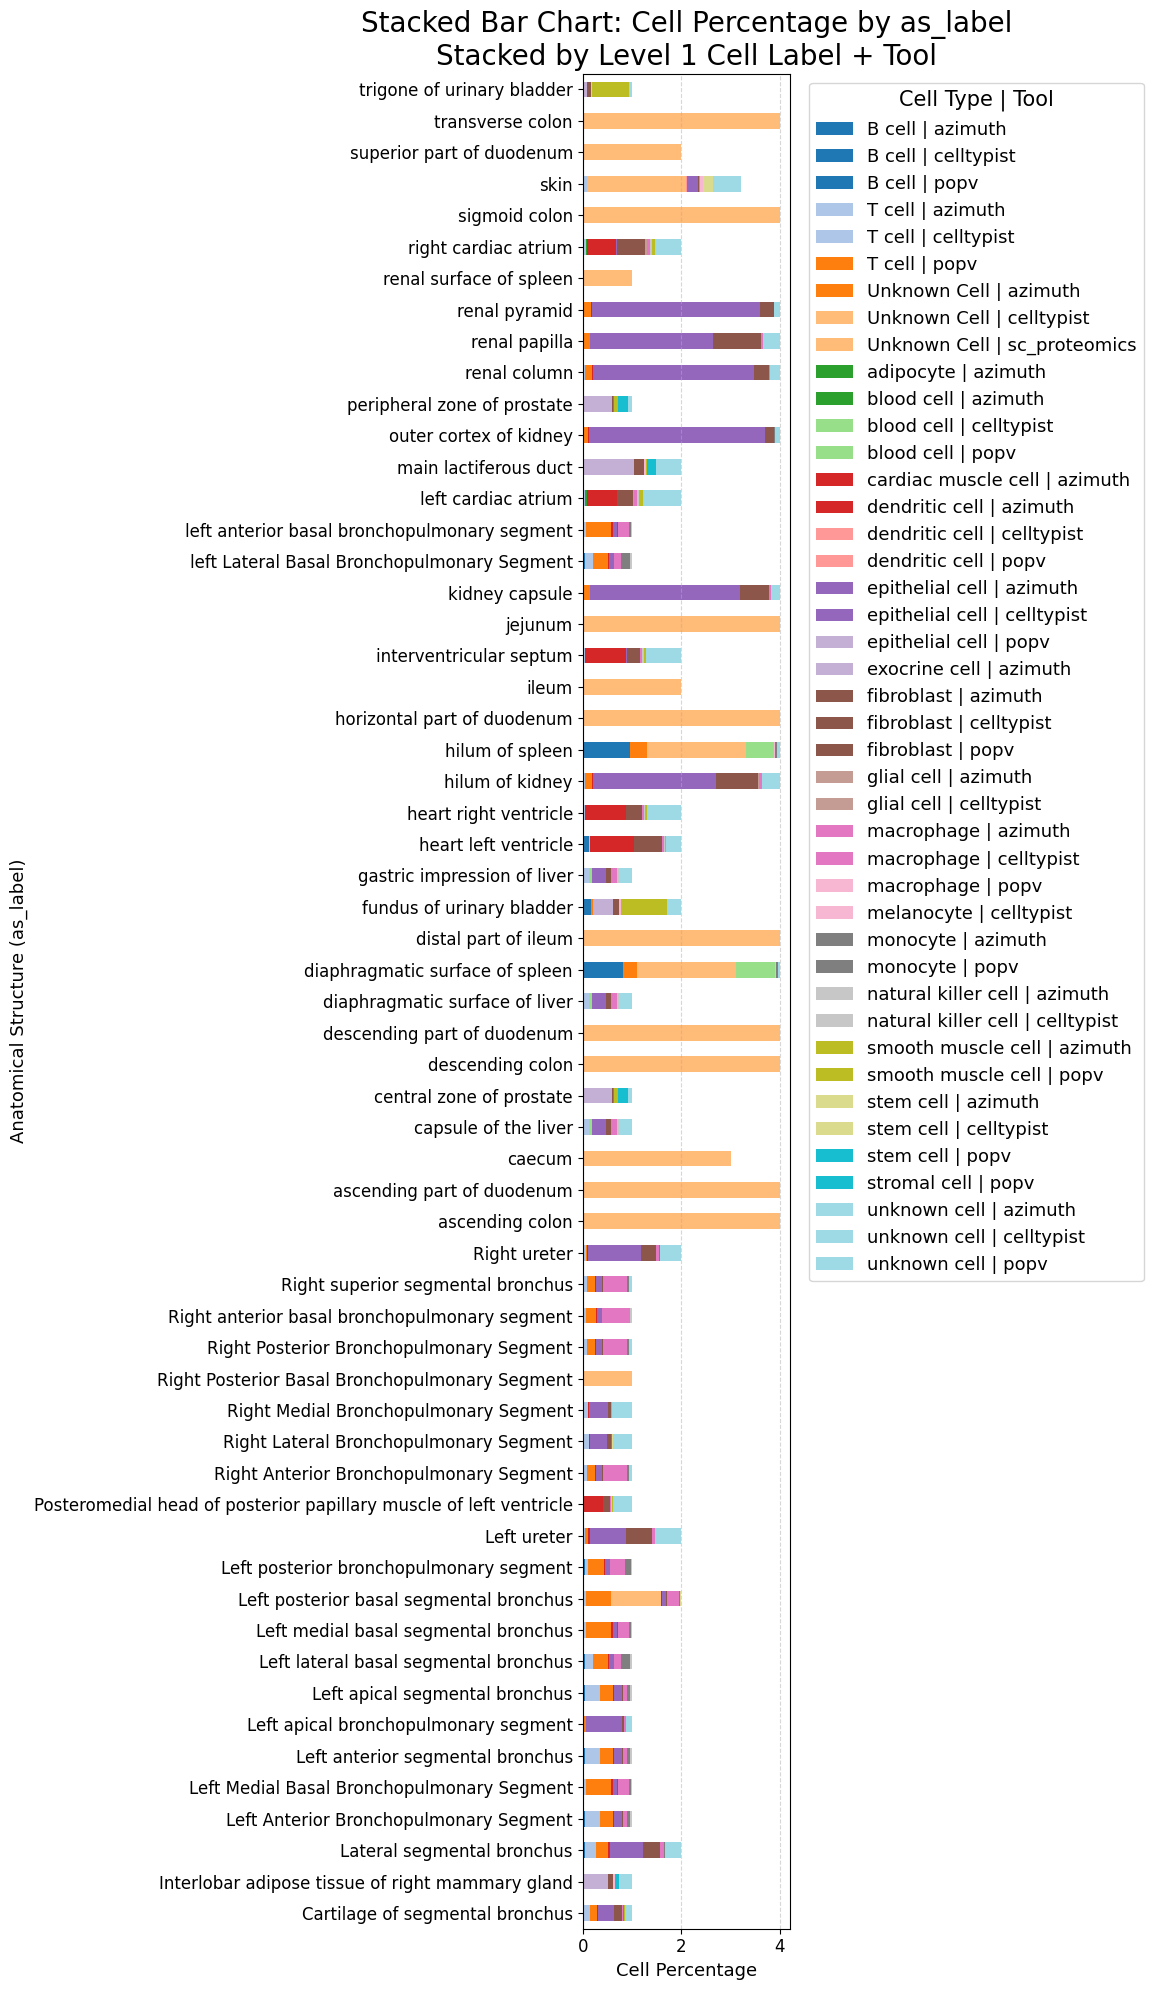

In [22]:

# Group by as_label, level_1_cell_label, and tool, summing the cell percentages
grouped = df_filtered.groupby(['as_label', 'level_1_cell_label', 'tool'])[
    'cell_percentage'].sum().reset_index()

# Combine level_1_cell_label and tool into one label for stacked bars
grouped['stack_label'] = grouped['level_1_cell_label'] + \
    " | " + grouped['tool']

# Pivot the data so each row is an as_label and each column is a stack_label
pivot_df = grouped.pivot(
    index='as_label', columns='stack_label', values='cell_percentage').fillna(0)

# Plot the stacked bar chart
ax = pivot_df.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 20),
    colormap='tab20'  # You can change to 'Set3', 'tab10', etc.
)

# Styling the plot
# Remove legend if desired
ax.legend_.remove()


plt.xlabel("Cell Percentage")
plt.ylabel("Anatomical Structure (as_label)")
plt.title("Stacked Bar Chart: Cell Percentage by as_label\nStacked by Level 1 Cell Label + Tool")
plt.legend(title="Cell Type | Tool",
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

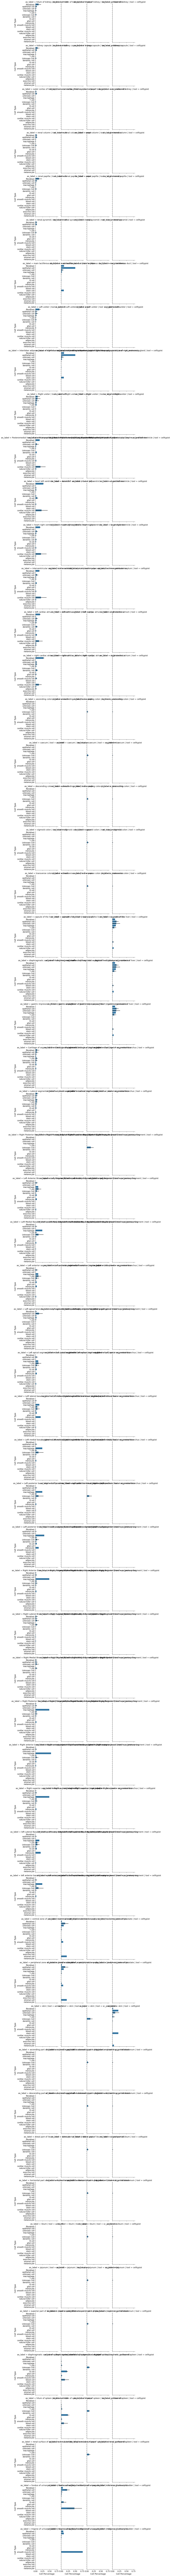

In [12]:
# Create a faceted bar plot
g = sns.catplot(
    data=df_filtered,
    x='cell_percentage',            # X-axis variable
    y='level_1_cell_label',               # Y-axis variable
    row='as_label',             # Variable for creating columns of subplots
    col='tool',
    # hue='level_1_cell_label',
    kind='bar',              # Specify bar plot
    height=4,                # Height of each subplot
    aspect=0.7,              # Width/height ratio
    # palette='viridis'        # Color palette
)

# Add titles and labels
g.set_axis_labels("Cell Percentage", "Cell Type")
# g.set_titles("{col_name}")
# g.suptitle("CTs per AS", y=1.02)
plt.tight_layout()
plt.show()

## ## Visualize (many vis)

In [ ]:
def build_separate_bar_graphs(df:pd.DataFrame, organ:str, sex:str, anatomical_structure_label:str, modality:str, tool:str):
  """Makes a grouped bar graph given the sex

  Args:
      df (pd.DataFrame): df with all data
      sex (str): needed sex
  """
  
  # check matches
  has_organ = df['organ'] == organ
  has_sex = df['sex'].str.lower() == sex.lower()
  has_as = df['as_label'] == anatomical_structure_label
  has_modality = df['modality'] == modality
  has_tool = df['tool'] == tool
  
  # sort
  df_sorted = df[has_organ & has_sex & has_as & has_modality & has_tool].sort_values(by=['cell_percentage'], ascending=False)
  
  # get top cell types
  top_n_cell_types = df_sorted['cell_label'].unique()[:5]
  df_top_n = df_sorted[df_sorted['cell_label'].isin(top_n_cell_types)]
  
  # plot
  g = sns.barplot(
      data=df_top_n,
    x='cell_percentage',
    y='cell_label',
    dodge=False,
    errorbar=None,
    width=0.05, # very thin bars
  )
  
  # customize labels
  plt.xlabel('Percentage')
  plt.ylabel('Cell Type')
  plt.title('')
  
  # size and layout
  plt.figure(figsize=(10, 2))  # Taller plot = less vertical crowding
  plt.tight_layout()
  
  # Save the plot as a PNG with 300 DPI
  g.figure.savefig(f'{output_folder}/{sex}_{anatomical_structure_label}_{tool}.png', dpi=300, bbox_inches='tight')

  # display plot
  print(f'{organ}, {sex}, {anatomical_structure_label}, {modality}, {tool}')
  plt.show()

values: Left kidney, Female, hilum of kidney, sc_transcriptomics, azimuth
Left kidney, Female, hilum of kidney, sc_transcriptomics, azimuth


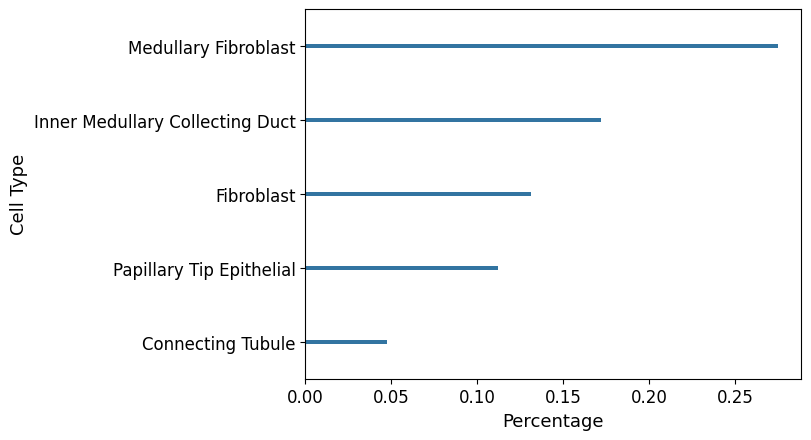

<Figure size 1000x200 with 0 Axes>

values: Left kidney, Female, kidney capsule, sc_transcriptomics, azimuth
Left kidney, Female, kidney capsule, sc_transcriptomics, azimuth


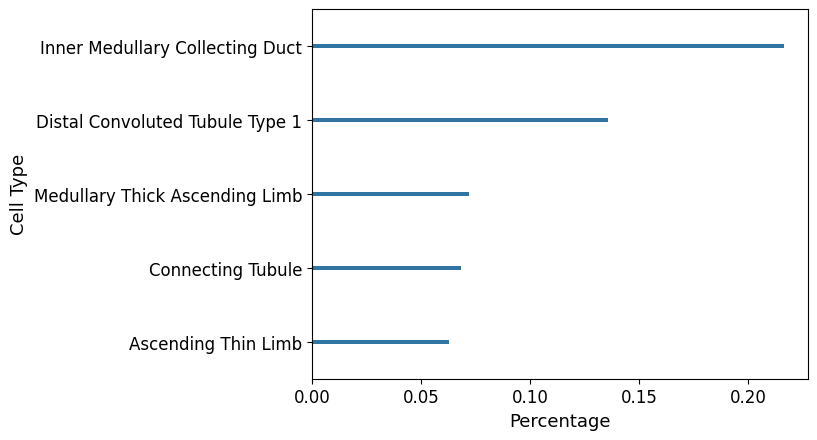

<Figure size 1000x200 with 0 Axes>

values: Left kidney, Female, outer cortex of kidney, sc_transcriptomics, azimuth
Left kidney, Female, outer cortex of kidney, sc_transcriptomics, azimuth


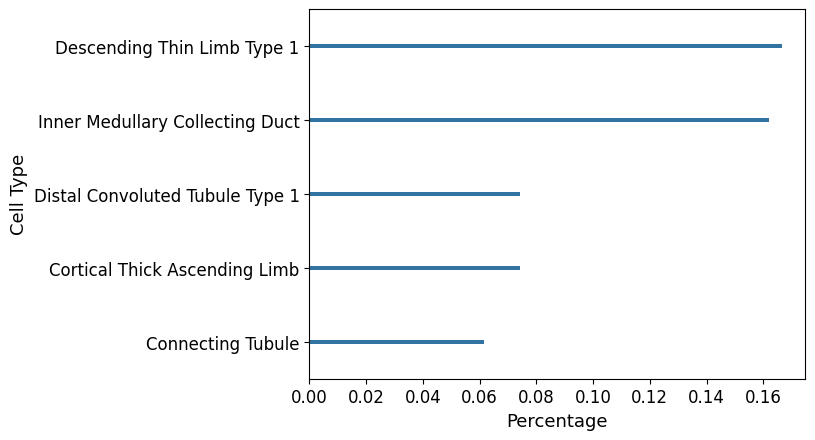

<Figure size 1000x200 with 0 Axes>

values: Left kidney, Female, renal column, sc_transcriptomics, azimuth
Left kidney, Female, renal column, sc_transcriptomics, azimuth


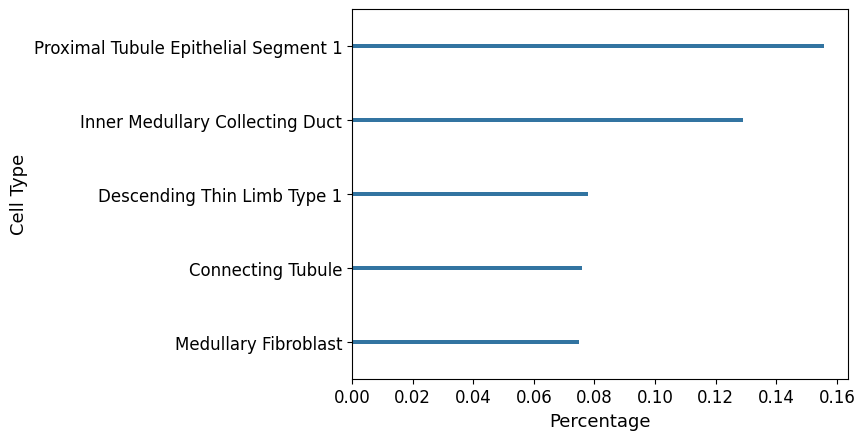

<Figure size 1000x200 with 0 Axes>

values: Left kidney, Female, renal papilla, sc_transcriptomics, azimuth
Left kidney, Female, renal papilla, sc_transcriptomics, azimuth


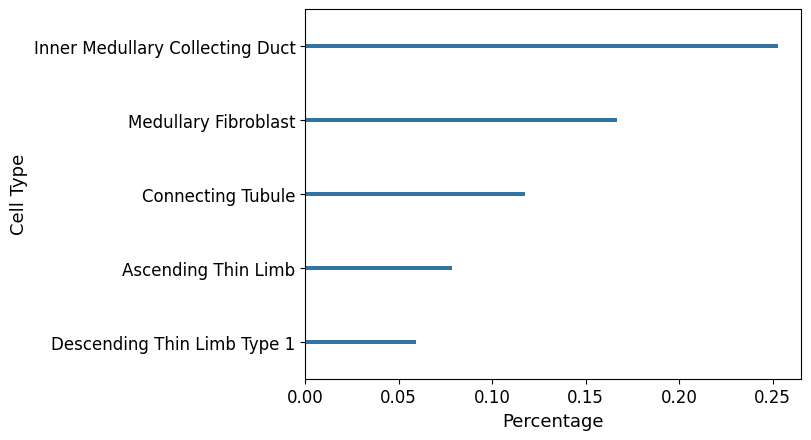

<Figure size 1000x200 with 0 Axes>

values: Left kidney, Female, renal pyramid, sc_transcriptomics, azimuth
Left kidney, Female, renal pyramid, sc_transcriptomics, azimuth


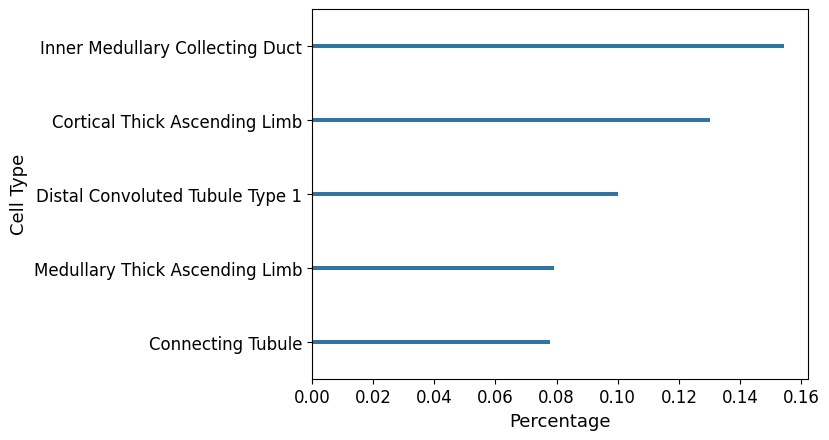

<Figure size 1000x200 with 0 Axes>

values: Left kidney, Male, hilum of kidney, sc_transcriptomics, azimuth
Left kidney, Male, hilum of kidney, sc_transcriptomics, azimuth


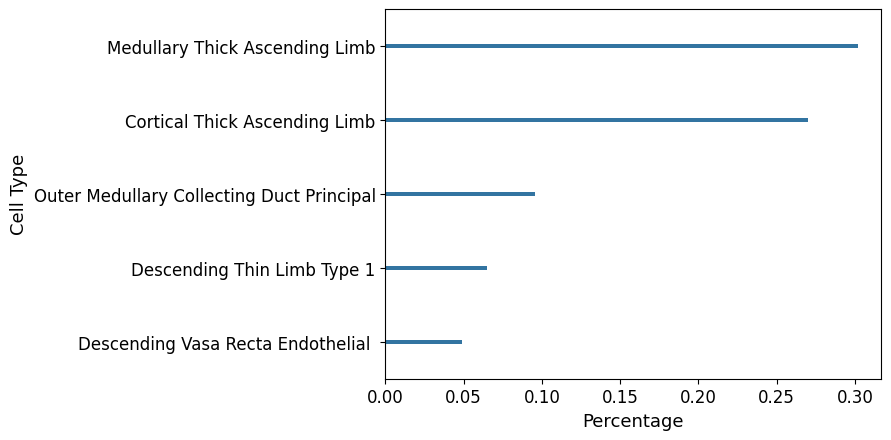

<Figure size 1000x200 with 0 Axes>

values: Left kidney, Male, kidney capsule, sc_transcriptomics, azimuth
Left kidney, Male, kidney capsule, sc_transcriptomics, azimuth


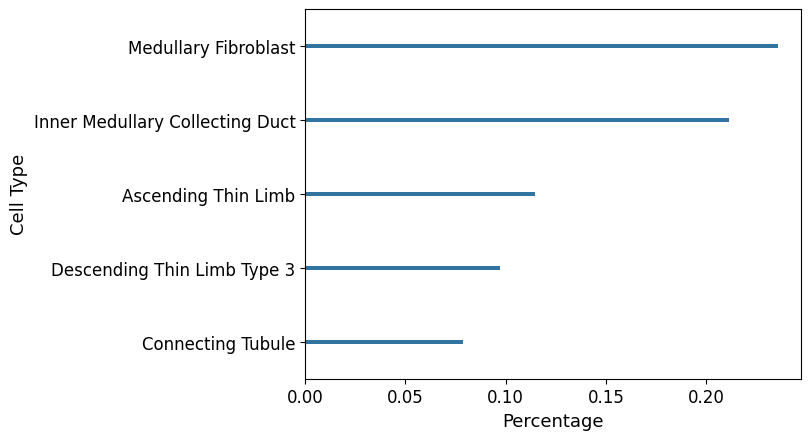

<Figure size 1000x200 with 0 Axes>

values: Left kidney, Male, outer cortex of kidney, sc_transcriptomics, azimuth
Left kidney, Male, outer cortex of kidney, sc_transcriptomics, azimuth


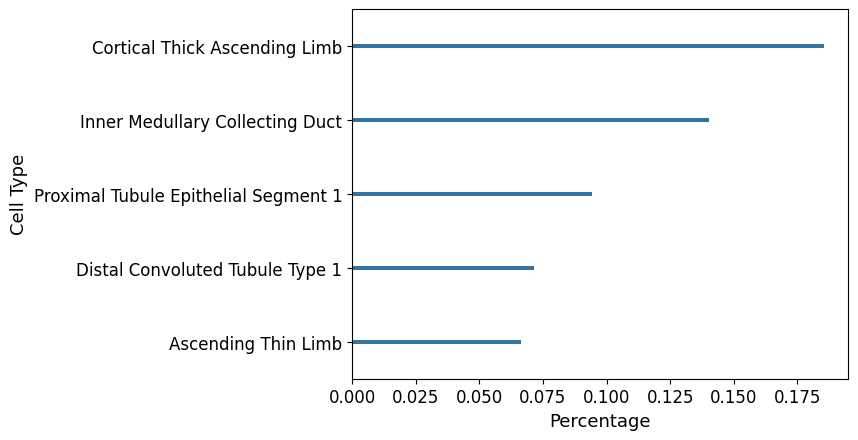

<Figure size 1000x200 with 0 Axes>

values: Left kidney, Male, renal column, sc_transcriptomics, azimuth
Left kidney, Male, renal column, sc_transcriptomics, azimuth


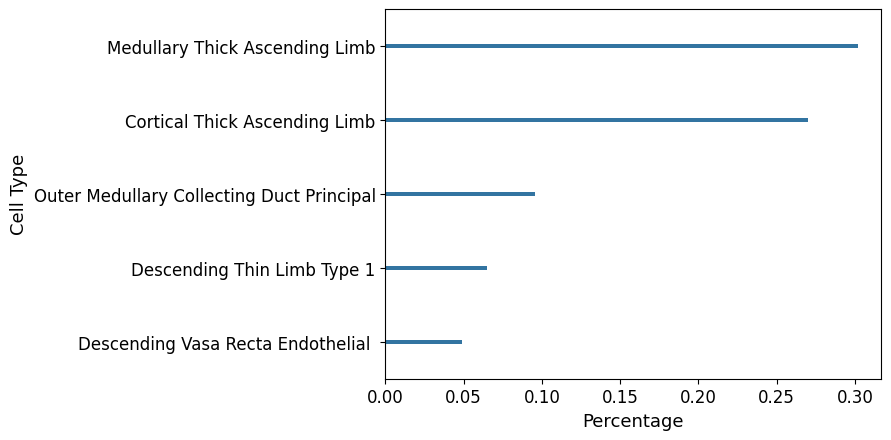

<Figure size 1000x200 with 0 Axes>

values: Left kidney, Male, renal papilla, sc_transcriptomics, azimuth
Left kidney, Male, renal papilla, sc_transcriptomics, azimuth


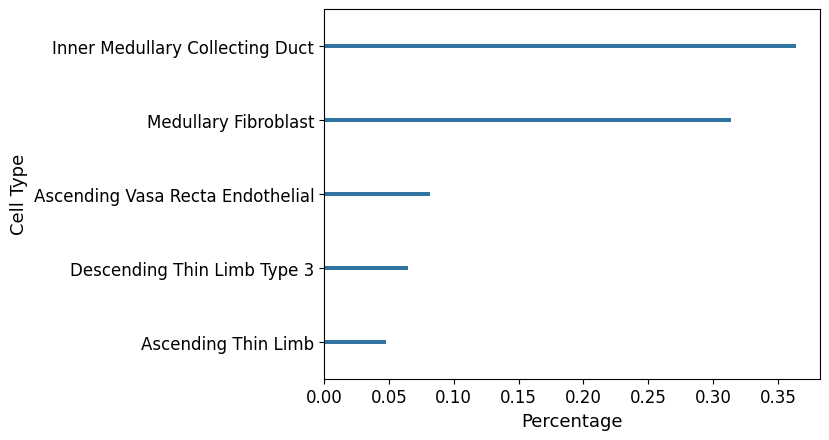

<Figure size 1000x200 with 0 Axes>

values: Left kidney, Male, renal pyramid, sc_transcriptomics, azimuth
Left kidney, Male, renal pyramid, sc_transcriptomics, azimuth


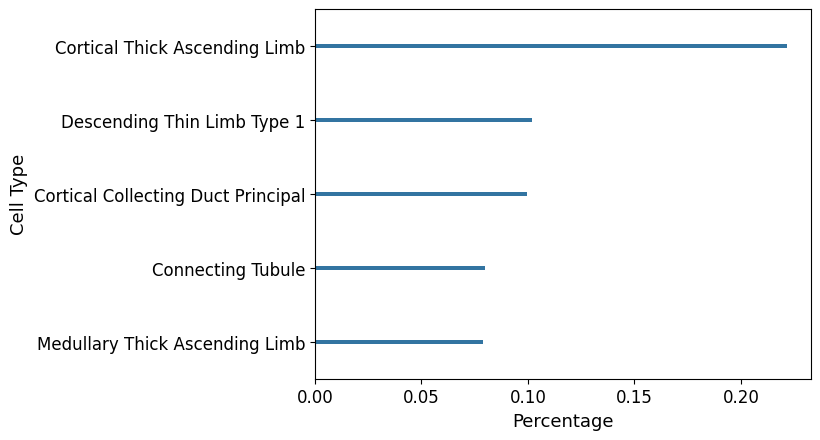

<Figure size 1000x200 with 0 Axes>

values: Left mammary gland, Female, main lactiferous duct, sc_transcriptomics, popv
Left mammary gland, Female, main lactiferous duct, sc_transcriptomics, popv


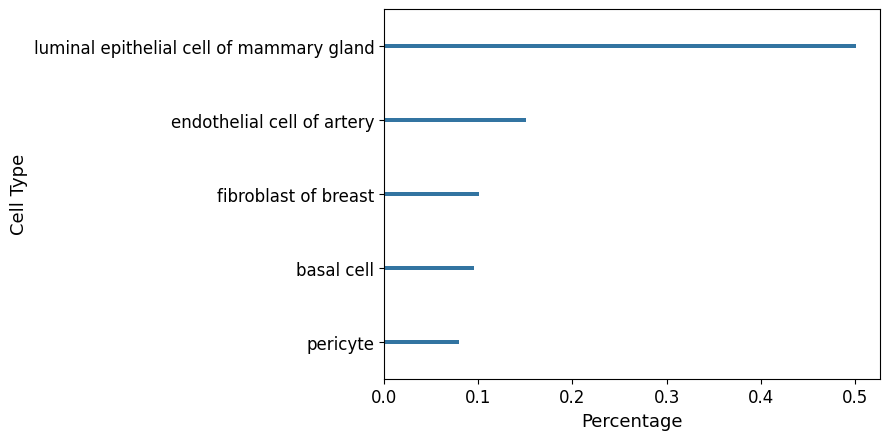

<Figure size 1000x200 with 0 Axes>

values: Left ureter, Female, Left ureter, sc_transcriptomics, azimuth
Left ureter, Female, Left ureter, sc_transcriptomics, azimuth


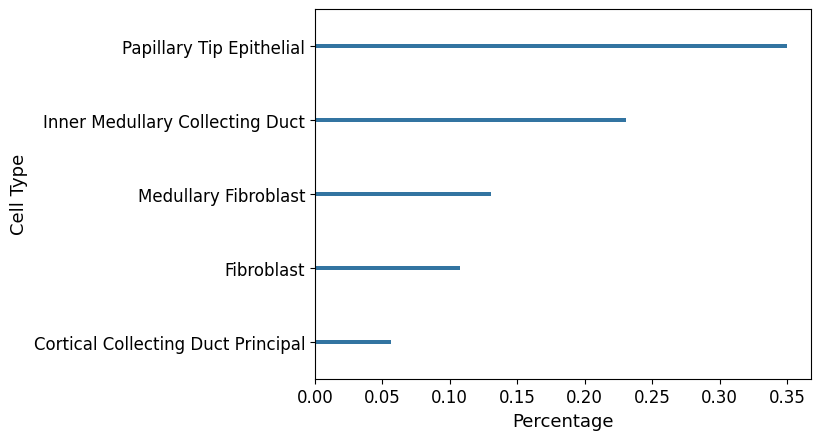

<Figure size 1000x200 with 0 Axes>

values: Left ureter, Male, Left ureter, sc_transcriptomics, azimuth
Left ureter, Male, Left ureter, sc_transcriptomics, azimuth


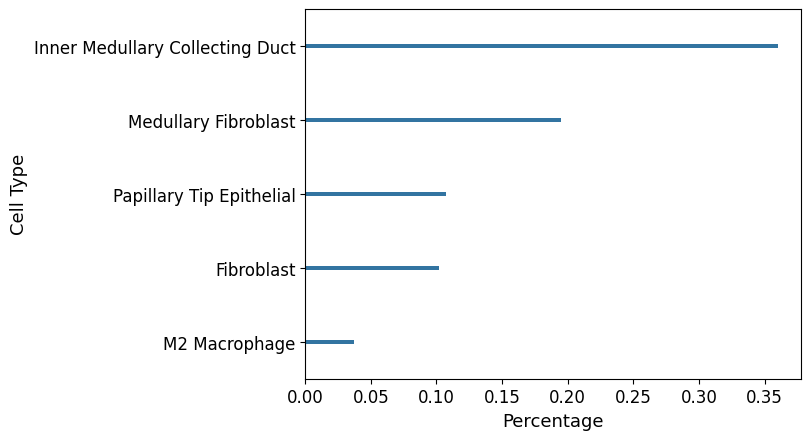

<Figure size 1000x200 with 0 Axes>

values: Right kidney, Female, hilum of kidney, sc_transcriptomics, azimuth
Right kidney, Female, hilum of kidney, sc_transcriptomics, azimuth


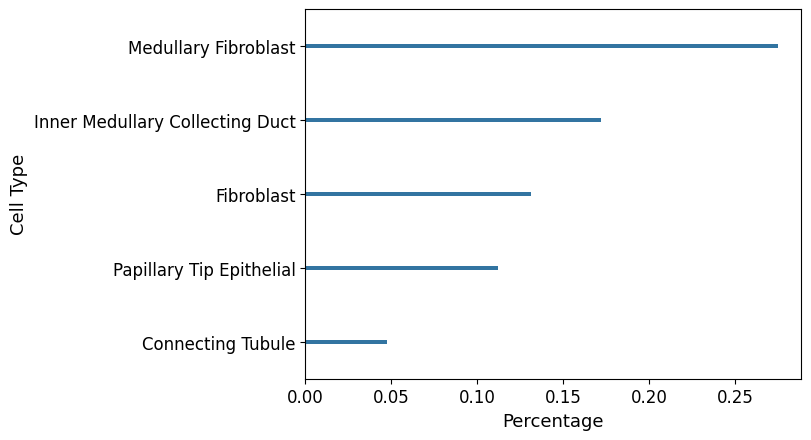

<Figure size 1000x200 with 0 Axes>

values: Right kidney, Female, kidney capsule, sc_transcriptomics, azimuth
Right kidney, Female, kidney capsule, sc_transcriptomics, azimuth


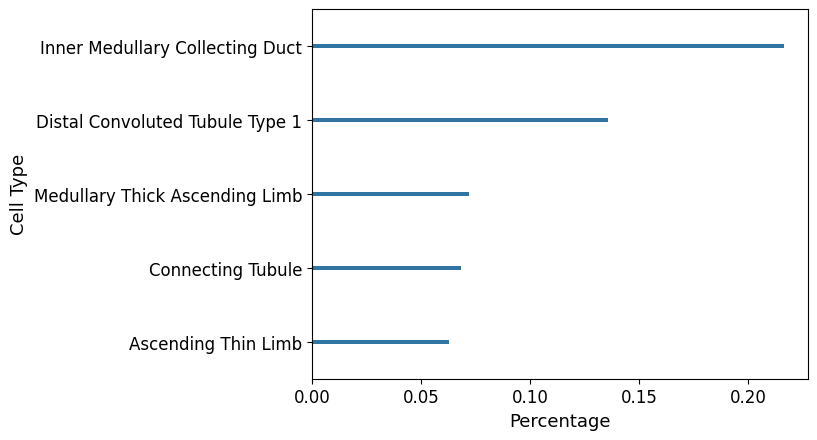

<Figure size 1000x200 with 0 Axes>

values: Right kidney, Female, outer cortex of kidney, sc_transcriptomics, azimuth
Right kidney, Female, outer cortex of kidney, sc_transcriptomics, azimuth


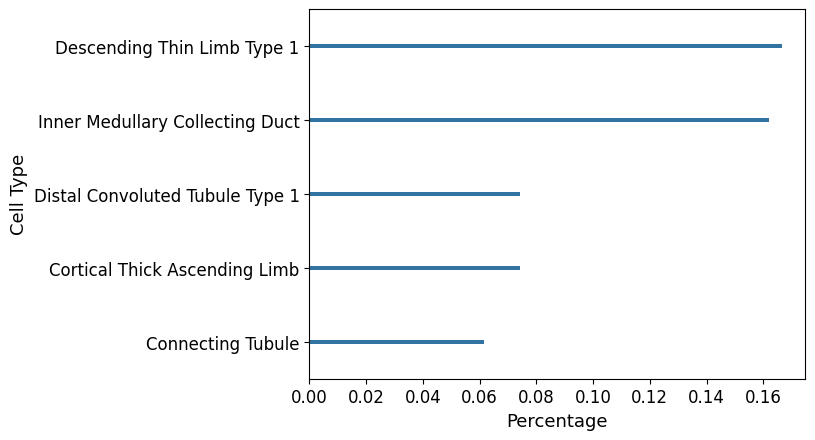

<Figure size 1000x200 with 0 Axes>

values: Right kidney, Female, renal column, sc_transcriptomics, azimuth
Right kidney, Female, renal column, sc_transcriptomics, azimuth


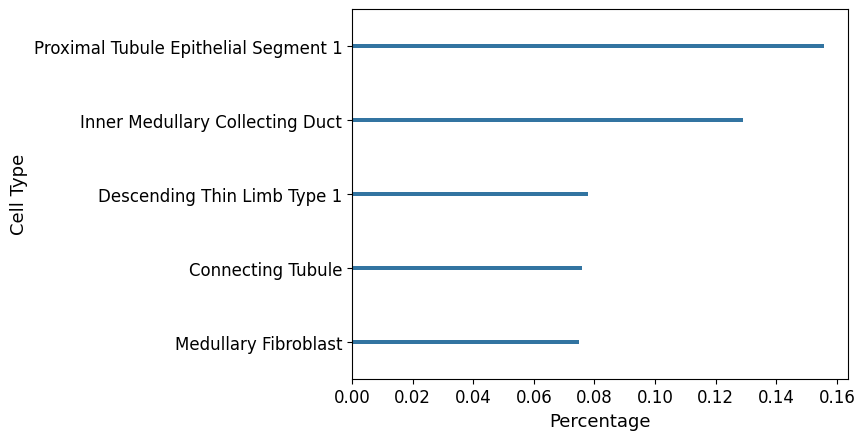

<Figure size 1000x200 with 0 Axes>

values: Right kidney, Female, renal papilla, sc_transcriptomics, azimuth
Right kidney, Female, renal papilla, sc_transcriptomics, azimuth


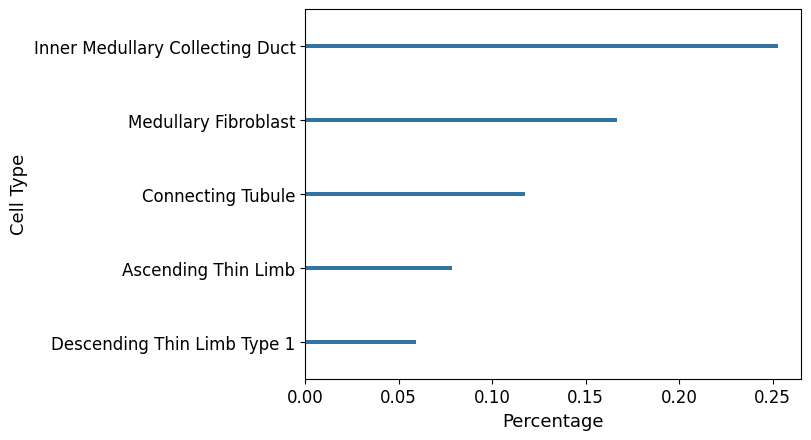

<Figure size 1000x200 with 0 Axes>

values: Right kidney, Female, renal pyramid, sc_transcriptomics, azimuth
Right kidney, Female, renal pyramid, sc_transcriptomics, azimuth


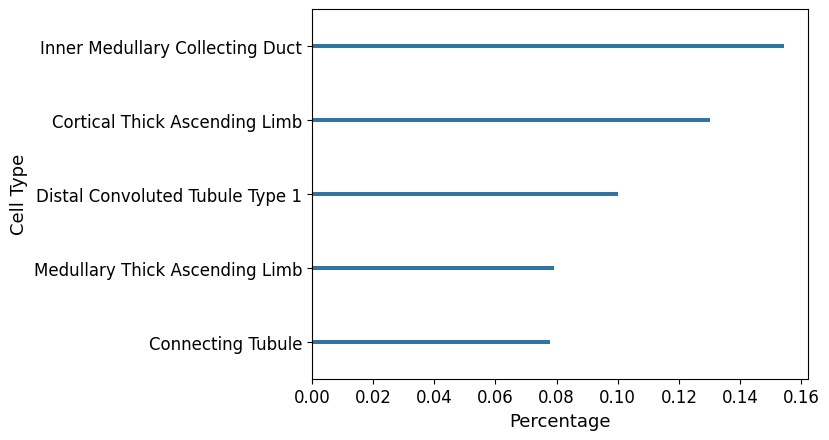

<Figure size 1000x200 with 0 Axes>

values: Right kidney, Male, hilum of kidney, sc_transcriptomics, azimuth
Right kidney, Male, hilum of kidney, sc_transcriptomics, azimuth


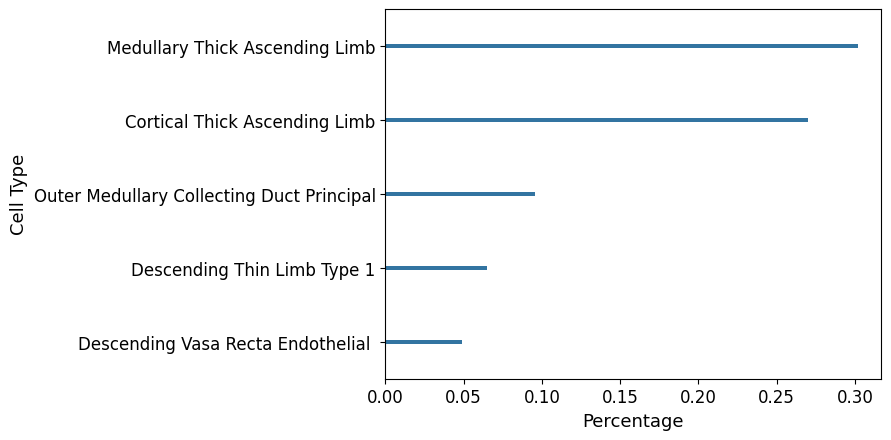

<Figure size 1000x200 with 0 Axes>

values: Right kidney, Male, kidney capsule, sc_transcriptomics, azimuth
Right kidney, Male, kidney capsule, sc_transcriptomics, azimuth


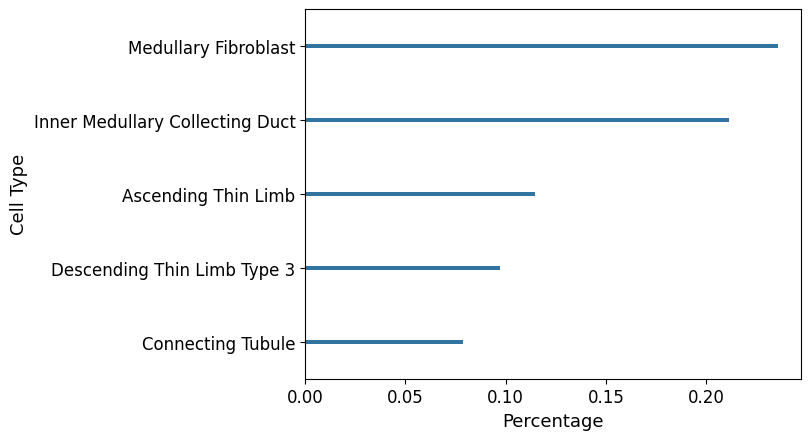

<Figure size 1000x200 with 0 Axes>

values: Right kidney, Male, outer cortex of kidney, sc_transcriptomics, azimuth
Right kidney, Male, outer cortex of kidney, sc_transcriptomics, azimuth


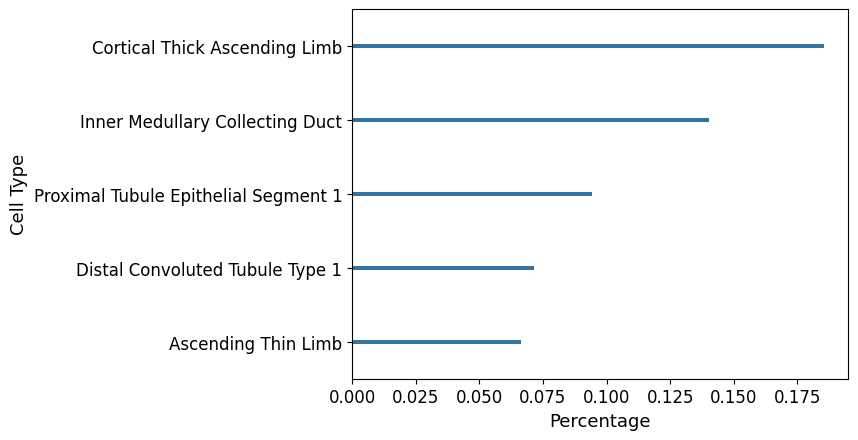

<Figure size 1000x200 with 0 Axes>

values: Right kidney, Male, renal column, sc_transcriptomics, azimuth
Right kidney, Male, renal column, sc_transcriptomics, azimuth


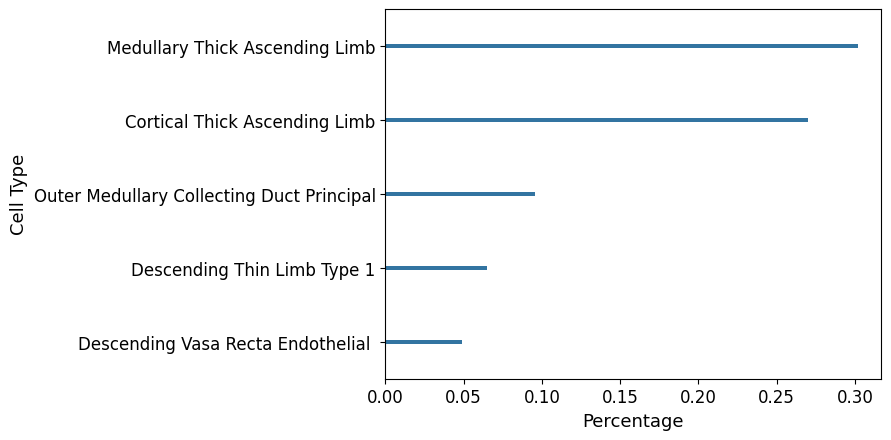

<Figure size 1000x200 with 0 Axes>

values: Right kidney, Male, renal papilla, sc_transcriptomics, azimuth
Right kidney, Male, renal papilla, sc_transcriptomics, azimuth


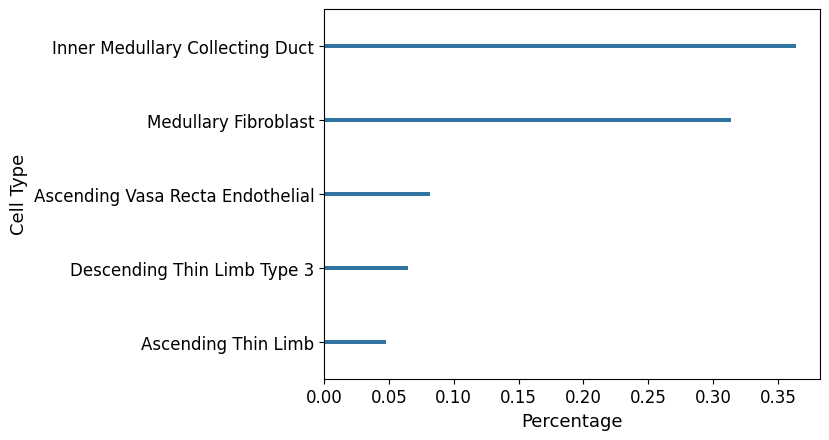

<Figure size 1000x200 with 0 Axes>

values: Right kidney, Male, renal pyramid, sc_transcriptomics, azimuth
Right kidney, Male, renal pyramid, sc_transcriptomics, azimuth


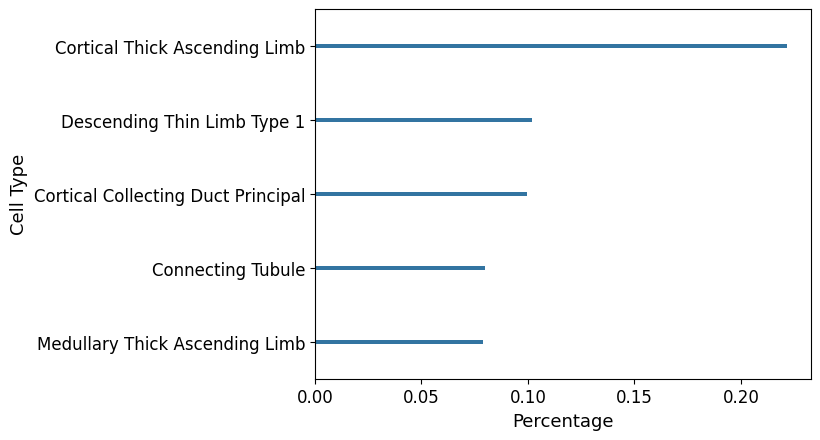

<Figure size 1000x200 with 0 Axes>

values: Right mammary gland, Female, Interlobar adipose tissue of right mammary gland, sc_transcriptomics, popv
Right mammary gland, Female, Interlobar adipose tissue of right mammary gland, sc_transcriptomics, popv


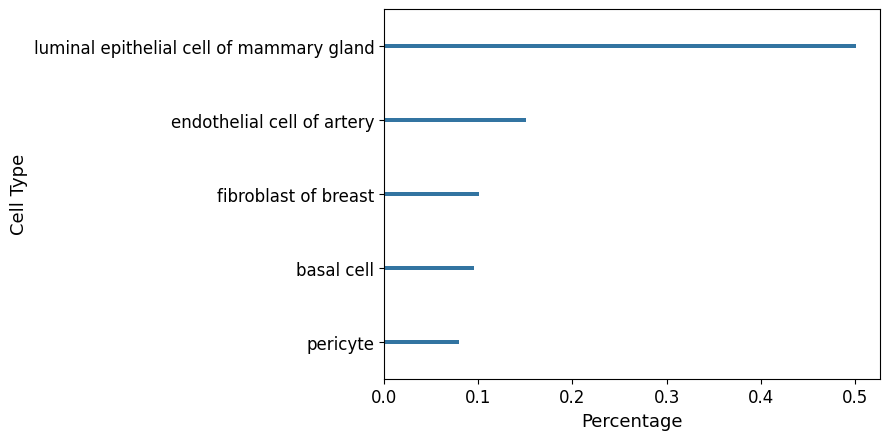

<Figure size 1000x200 with 0 Axes>

values: Right mammary gland, Female, main lactiferous duct, sc_transcriptomics, popv
Right mammary gland, Female, main lactiferous duct, sc_transcriptomics, popv


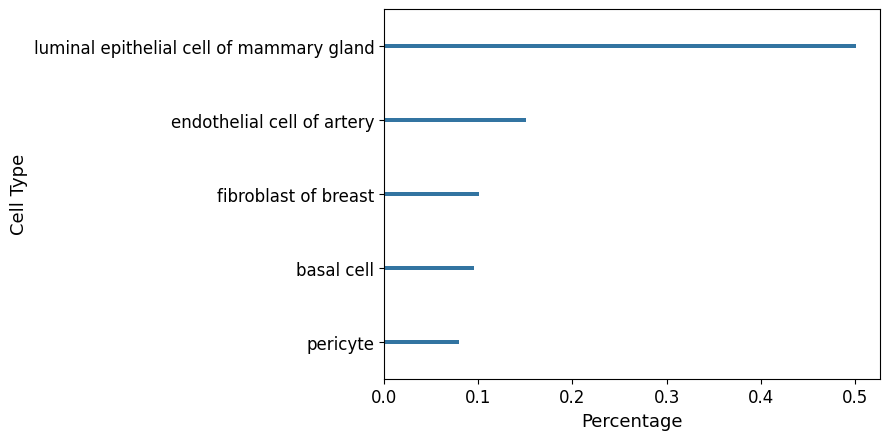

<Figure size 1000x200 with 0 Axes>

values: Right ureter, Female, Right ureter, sc_transcriptomics, azimuth
Right ureter, Female, Right ureter, sc_transcriptomics, azimuth


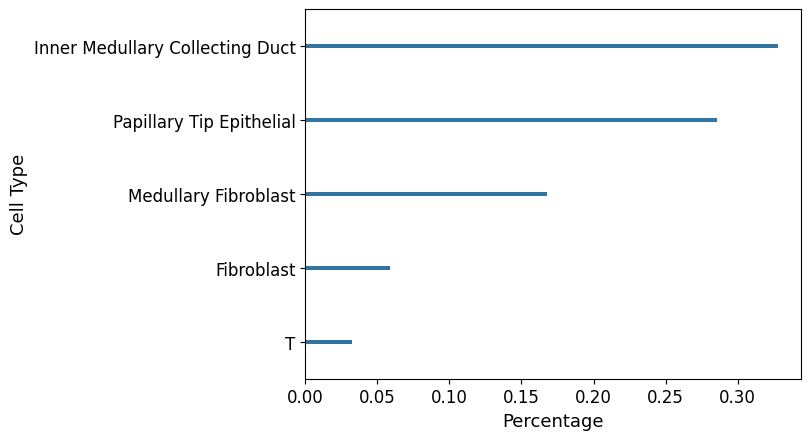

<Figure size 1000x200 with 0 Axes>

values: Right ureter, Male, Right ureter, sc_transcriptomics, azimuth
Right ureter, Male, Right ureter, sc_transcriptomics, azimuth


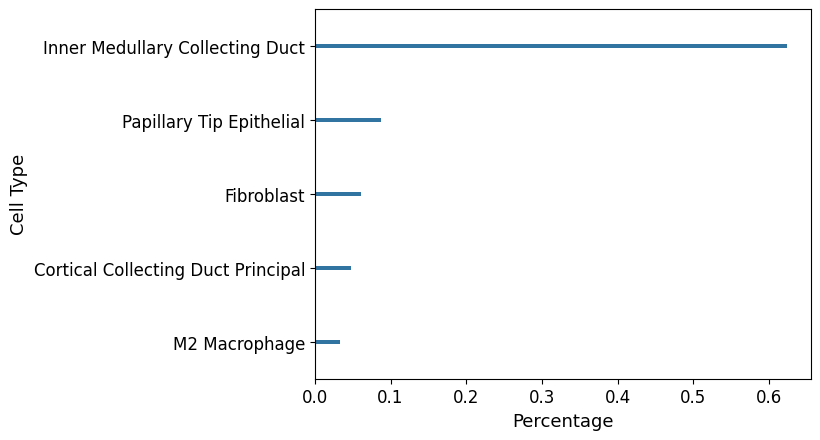

<Figure size 1000x200 with 0 Axes>

values: heart, Female, Posteromedial head of posterior papillary muscle of left ventricle, sc_transcriptomics, azimuth
heart, Female, Posteromedial head of posterior papillary muscle of left ventricle, sc_transcriptomics, azimuth


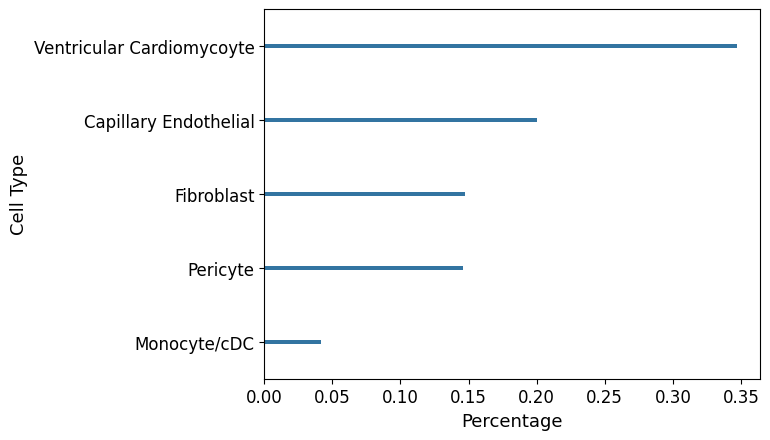

<Figure size 1000x200 with 0 Axes>

values: heart, Female, heart left ventricle, sc_transcriptomics, azimuth
heart, Female, heart left ventricle, sc_transcriptomics, azimuth


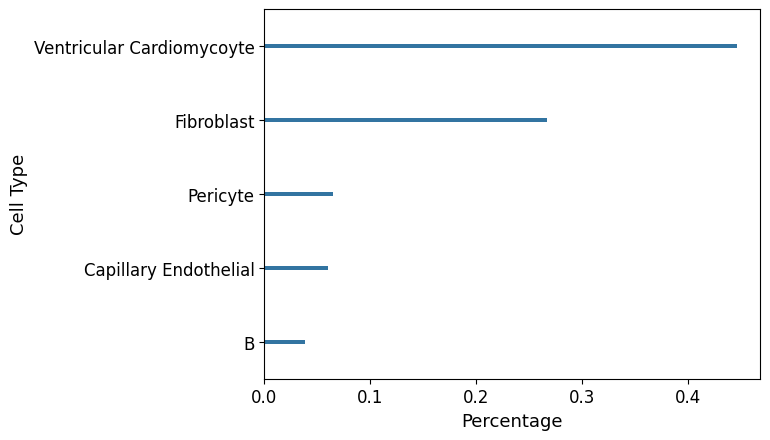

<Figure size 1000x200 with 0 Axes>

values: heart, Female, heart right ventricle, sc_transcriptomics, azimuth
heart, Female, heart right ventricle, sc_transcriptomics, azimuth


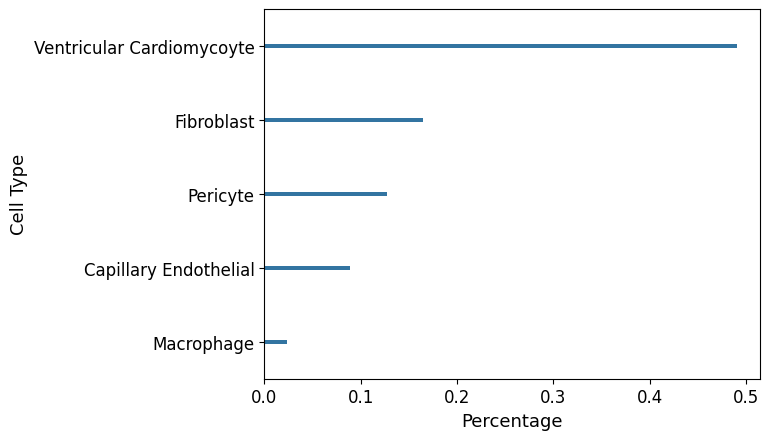

<Figure size 1000x200 with 0 Axes>

values: heart, Female, interventricular septum, sc_transcriptomics, azimuth
heart, Female, interventricular septum, sc_transcriptomics, azimuth


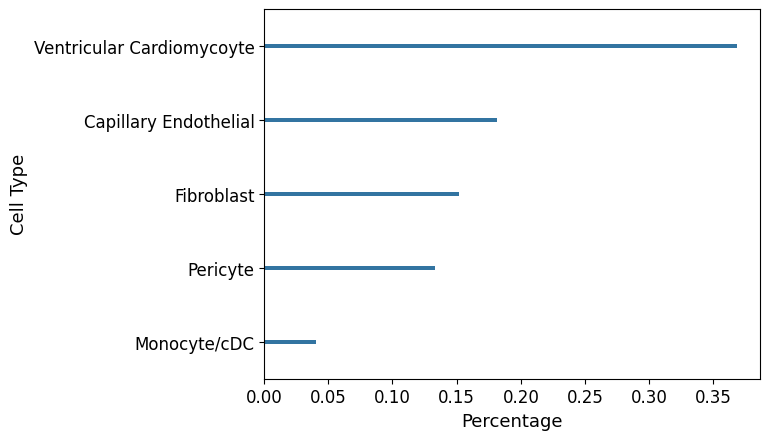

<Figure size 1000x200 with 0 Axes>

values: heart, Female, left cardiac atrium, sc_transcriptomics, azimuth
heart, Female, left cardiac atrium, sc_transcriptomics, azimuth


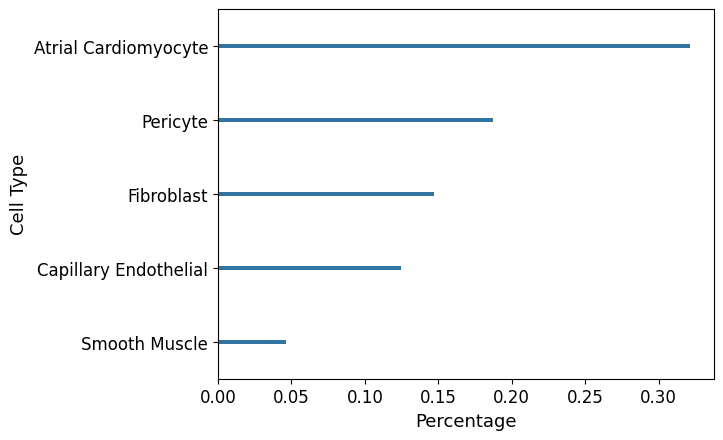

<Figure size 1000x200 with 0 Axes>

values: heart, Female, right cardiac atrium, sc_transcriptomics, azimuth
heart, Female, right cardiac atrium, sc_transcriptomics, azimuth


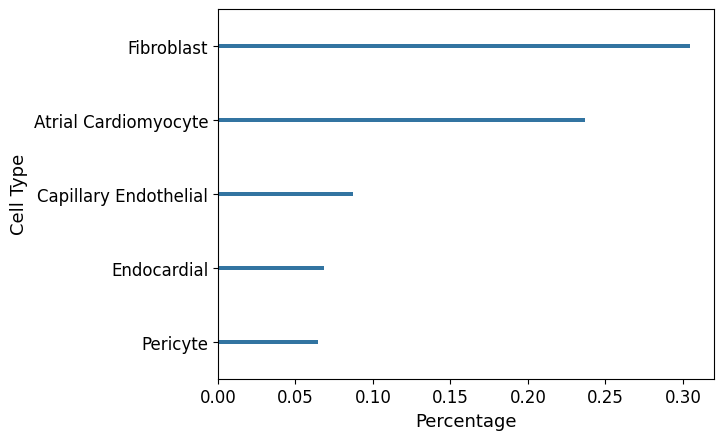

<Figure size 1000x200 with 0 Axes>

values: heart, Male, heart left ventricle, sc_transcriptomics, azimuth
heart, Male, heart left ventricle, sc_transcriptomics, azimuth


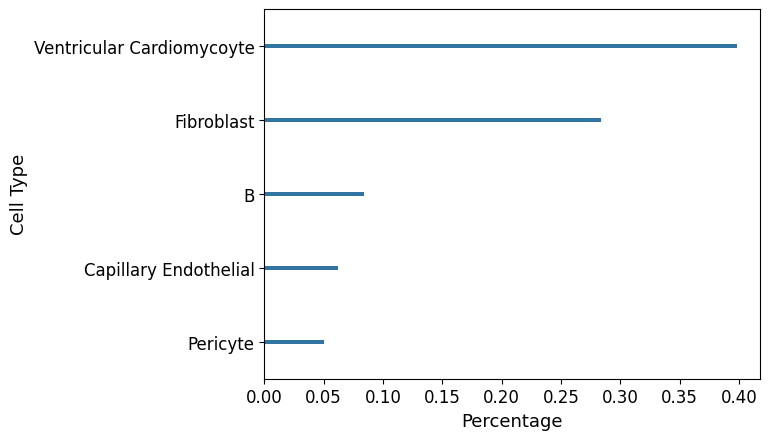

<Figure size 1000x200 with 0 Axes>

values: heart, Male, heart right ventricle, sc_transcriptomics, azimuth
heart, Male, heart right ventricle, sc_transcriptomics, azimuth


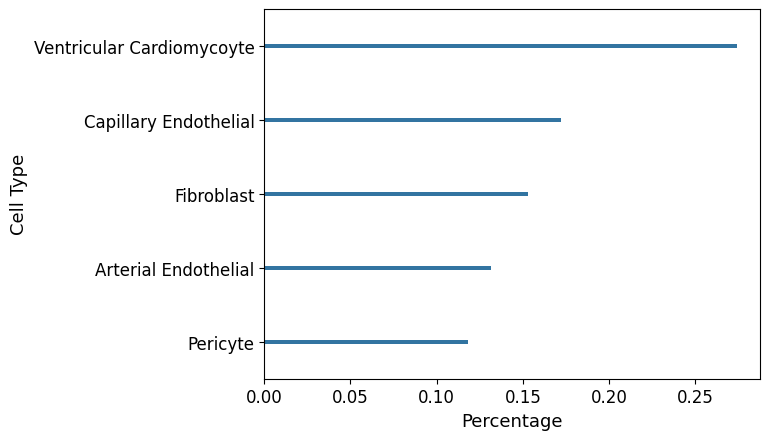

<Figure size 1000x200 with 0 Axes>

values: heart, Male, interventricular septum, sc_transcriptomics, azimuth
heart, Male, interventricular septum, sc_transcriptomics, azimuth


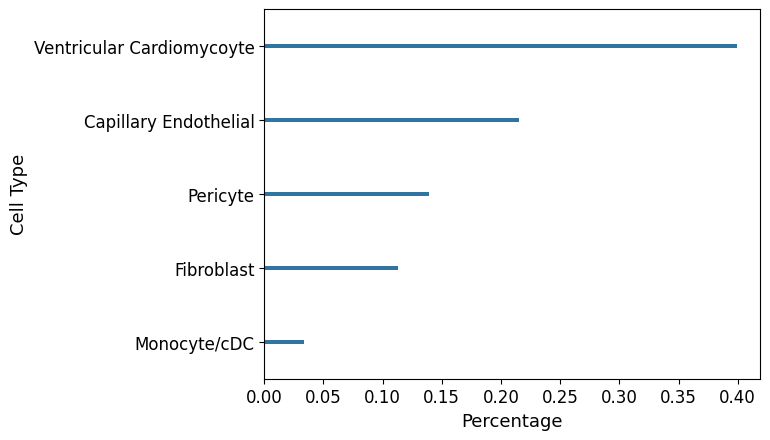

<Figure size 1000x200 with 0 Axes>

values: heart, Male, left cardiac atrium, sc_transcriptomics, azimuth
heart, Male, left cardiac atrium, sc_transcriptomics, azimuth


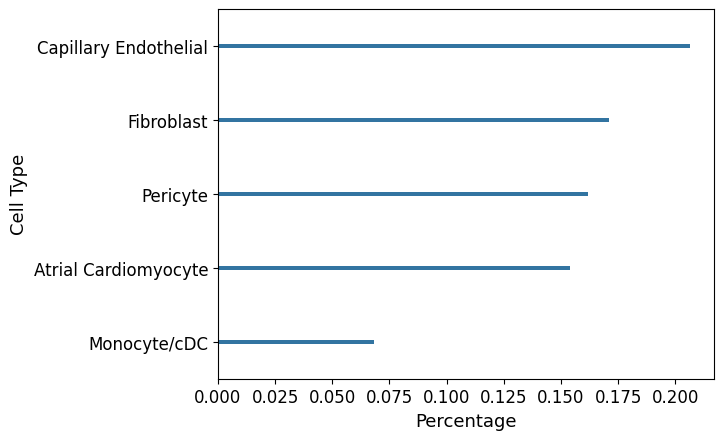

<Figure size 1000x200 with 0 Axes>

values: heart, Male, right cardiac atrium, sc_transcriptomics, azimuth
heart, Male, right cardiac atrium, sc_transcriptomics, azimuth


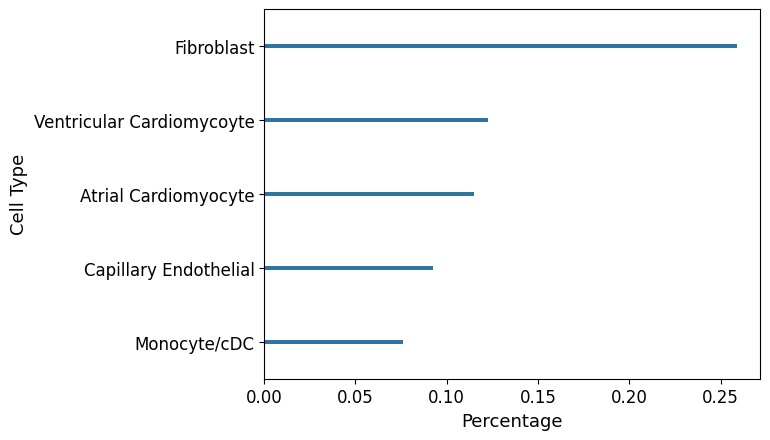

<Figure size 1000x200 with 0 Axes>

values: large intestine, Female, ascending colon, sc_proteomics, sc_proteomics
large intestine, Female, ascending colon, sc_proteomics, sc_proteomics


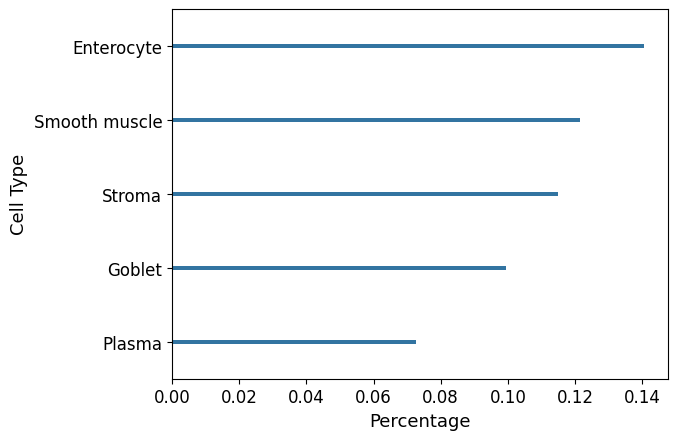

<Figure size 1000x200 with 0 Axes>

values: large intestine, Female, ascending colon, sc_transcriptomics, celltypist
large intestine, Female, ascending colon, sc_transcriptomics, celltypist


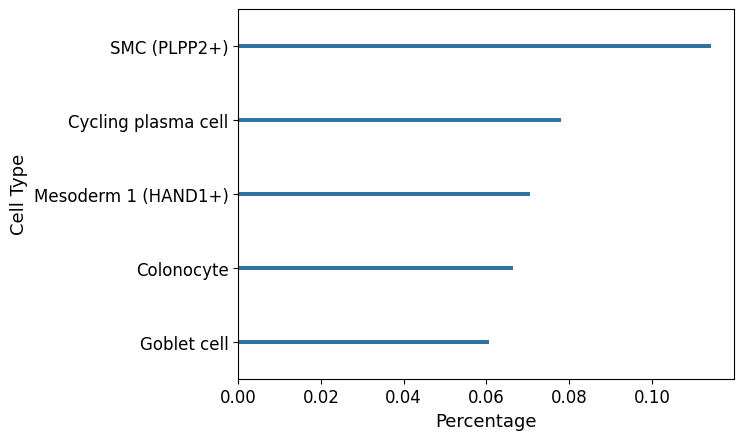

<Figure size 1000x200 with 0 Axes>

values: large intestine, Female, caecum, sc_proteomics, sc_proteomics
large intestine, Female, caecum, sc_proteomics, sc_proteomics


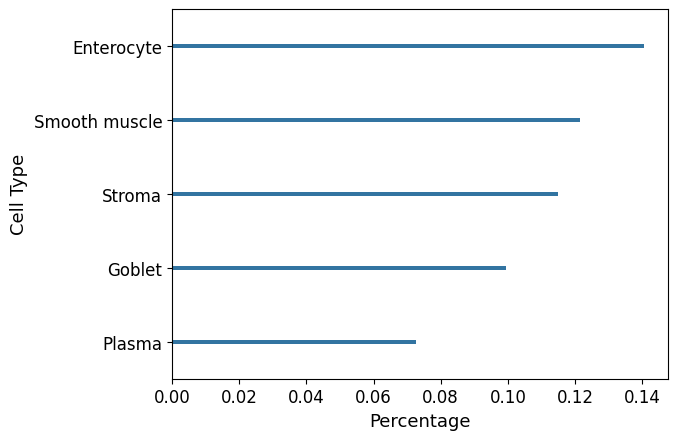

<Figure size 1000x200 with 0 Axes>

values: large intestine, Female, caecum, sc_transcriptomics, celltypist
large intestine, Female, caecum, sc_transcriptomics, celltypist


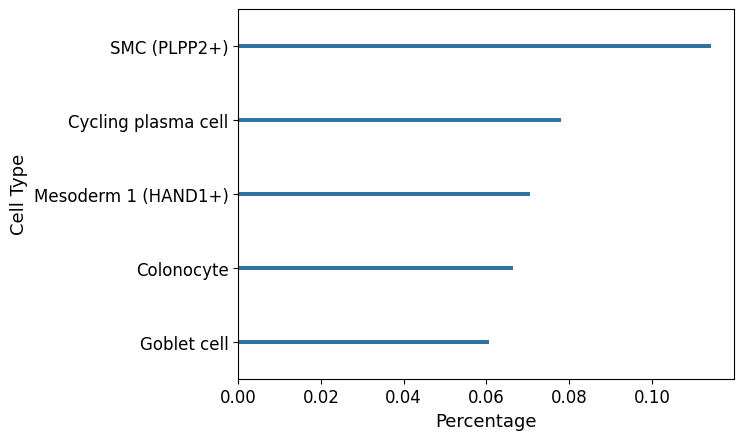

<Figure size 1000x200 with 0 Axes>

values: large intestine, Female, descending colon, sc_proteomics, sc_proteomics
large intestine, Female, descending colon, sc_proteomics, sc_proteomics


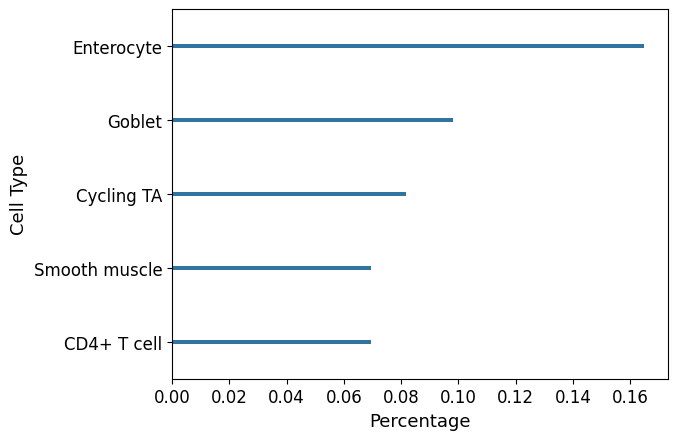

<Figure size 1000x200 with 0 Axes>

values: large intestine, Female, descending colon, sc_transcriptomics, celltypist
large intestine, Female, descending colon, sc_transcriptomics, celltypist


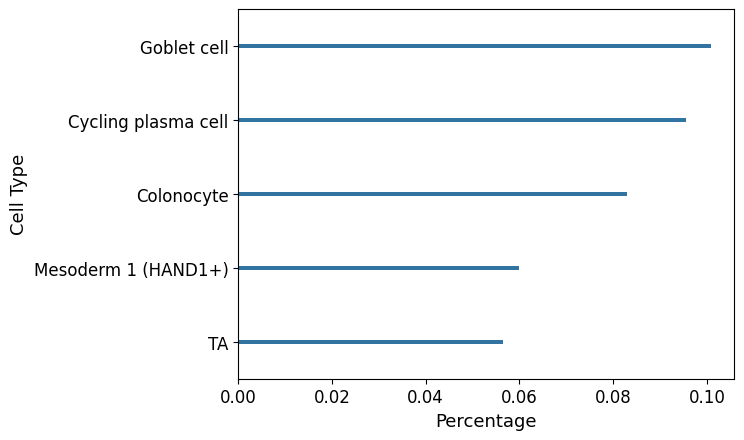

<Figure size 1000x200 with 0 Axes>

values: large intestine, Female, sigmoid colon, sc_proteomics, sc_proteomics
large intestine, Female, sigmoid colon, sc_proteomics, sc_proteomics


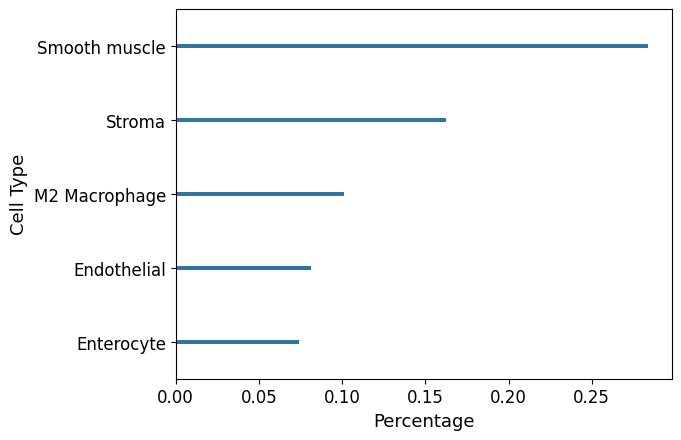

<Figure size 1000x200 with 0 Axes>

values: large intestine, Female, sigmoid colon, sc_transcriptomics, celltypist
large intestine, Female, sigmoid colon, sc_transcriptomics, celltypist


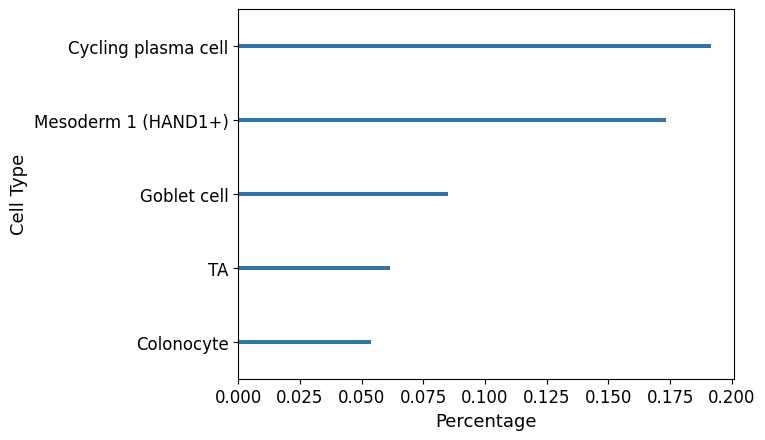

<Figure size 1000x200 with 0 Axes>

values: large intestine, Female, transverse colon, sc_proteomics, sc_proteomics
large intestine, Female, transverse colon, sc_proteomics, sc_proteomics


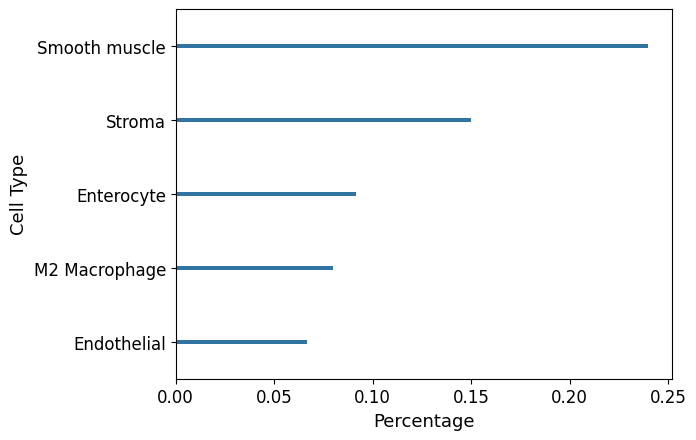

<Figure size 1000x200 with 0 Axes>

values: large intestine, Female, transverse colon, sc_transcriptomics, celltypist
large intestine, Female, transverse colon, sc_transcriptomics, celltypist


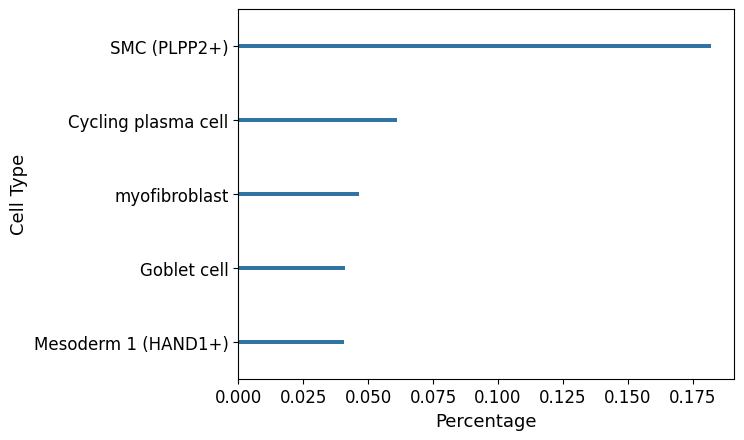

<Figure size 1000x200 with 0 Axes>

values: large intestine, Male, ascending colon, sc_proteomics, sc_proteomics
large intestine, Male, ascending colon, sc_proteomics, sc_proteomics


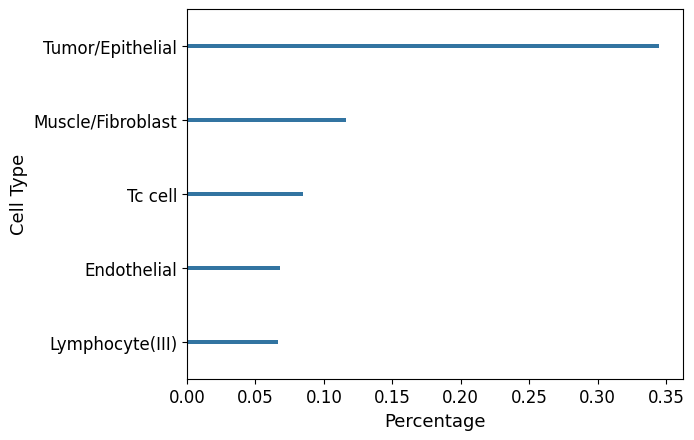

<Figure size 1000x200 with 0 Axes>

values: large intestine, Male, ascending colon, sc_transcriptomics, celltypist
large intestine, Male, ascending colon, sc_transcriptomics, celltypist


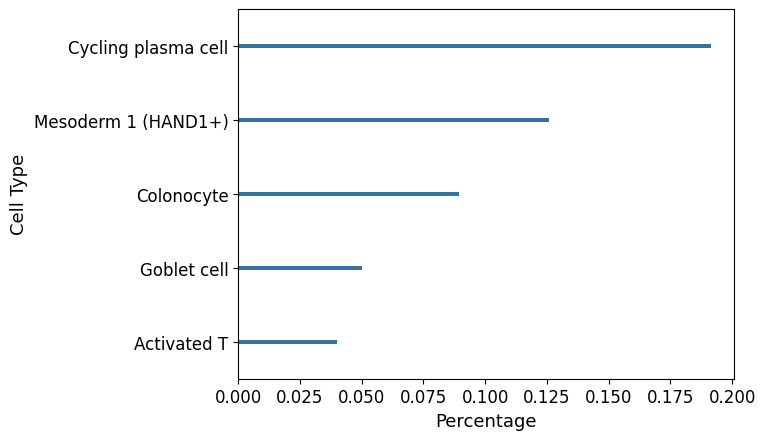

<Figure size 1000x200 with 0 Axes>

values: large intestine, Male, caecum, sc_proteomics, sc_proteomics
large intestine, Male, caecum, sc_proteomics, sc_proteomics


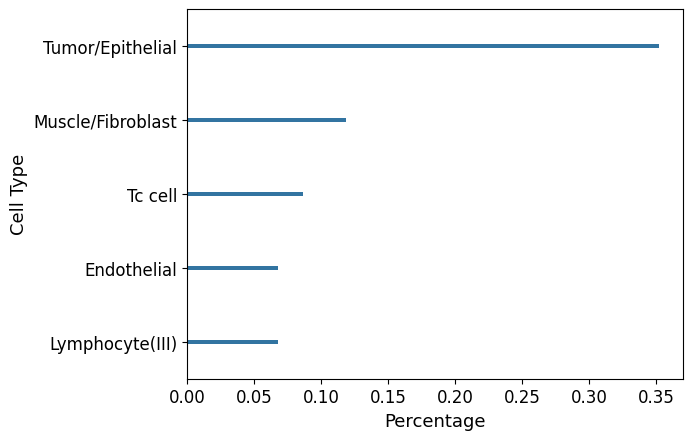

<Figure size 1000x200 with 0 Axes>

values: large intestine, Male, descending colon, sc_proteomics, sc_proteomics
large intestine, Male, descending colon, sc_proteomics, sc_proteomics


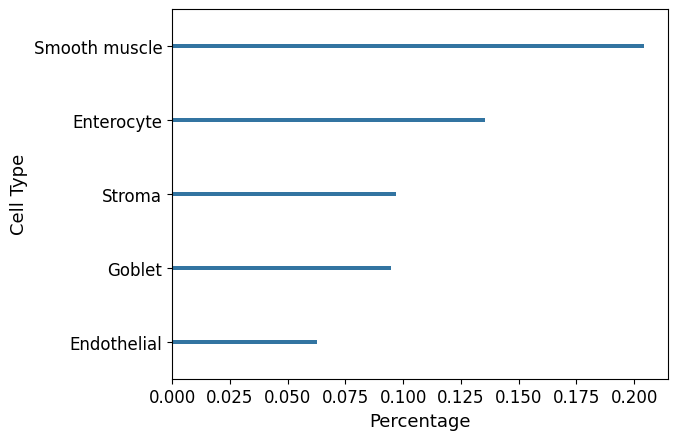

<Figure size 1000x200 with 0 Axes>

values: large intestine, Male, descending colon, sc_transcriptomics, celltypist
large intestine, Male, descending colon, sc_transcriptomics, celltypist


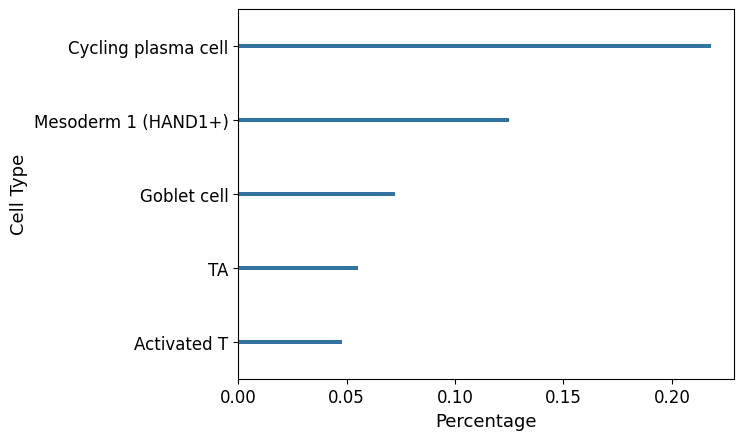

<Figure size 1000x200 with 0 Axes>

values: large intestine, Male, sigmoid colon, sc_proteomics, sc_proteomics
large intestine, Male, sigmoid colon, sc_proteomics, sc_proteomics


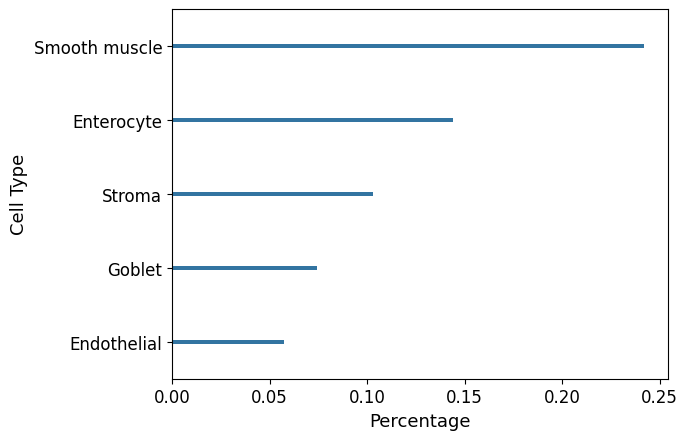

<Figure size 1000x200 with 0 Axes>

values: large intestine, Male, sigmoid colon, sc_transcriptomics, celltypist
large intestine, Male, sigmoid colon, sc_transcriptomics, celltypist


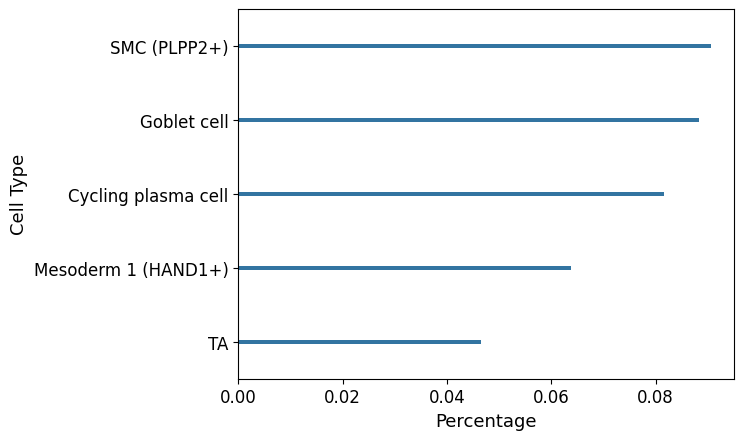

<Figure size 1000x200 with 0 Axes>

values: large intestine, Male, transverse colon, sc_proteomics, sc_proteomics
large intestine, Male, transverse colon, sc_proteomics, sc_proteomics


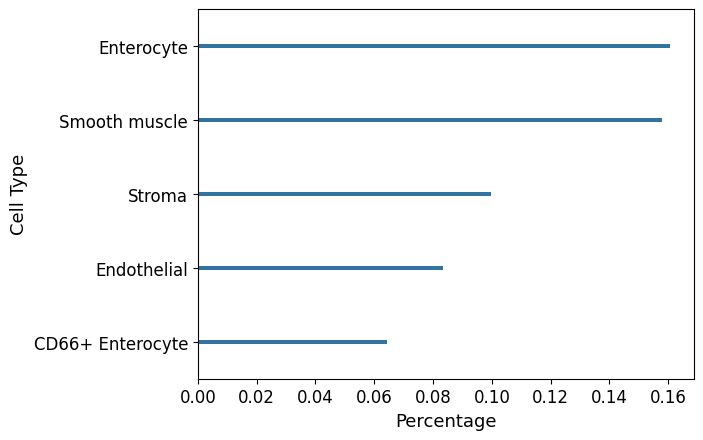

<Figure size 1000x200 with 0 Axes>

values: large intestine, Male, transverse colon, sc_transcriptomics, celltypist
large intestine, Male, transverse colon, sc_transcriptomics, celltypist


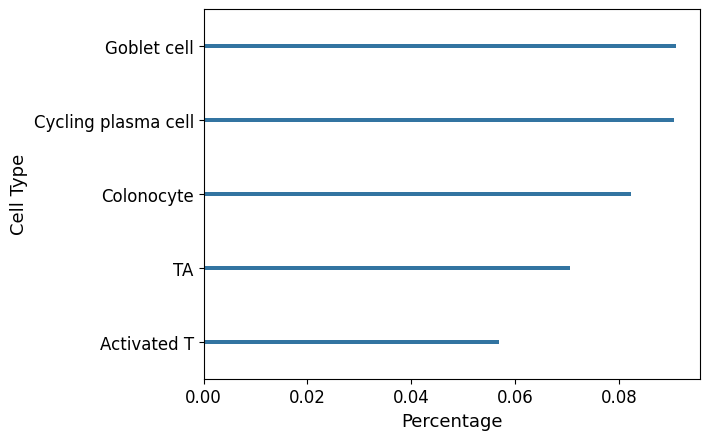

<Figure size 1000x200 with 0 Axes>

values: liver, Male, capsule of the liver, sc_transcriptomics, celltypist
liver, Male, capsule of the liver, sc_transcriptomics, celltypist


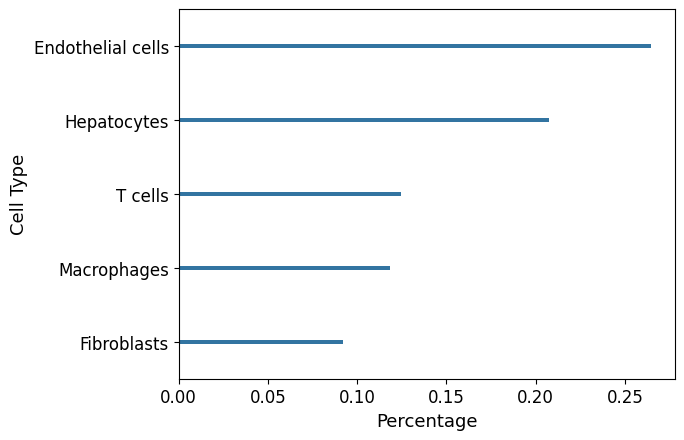

<Figure size 1000x200 with 0 Axes>

values: liver, Male, diaphragmatic surface of liver, sc_transcriptomics, celltypist
liver, Male, diaphragmatic surface of liver, sc_transcriptomics, celltypist


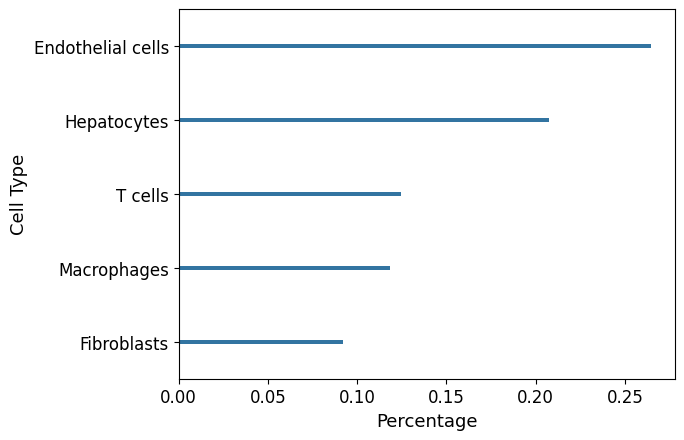

<Figure size 1000x200 with 0 Axes>

values: liver, Male, gastric impression of liver, sc_transcriptomics, celltypist
liver, Male, gastric impression of liver, sc_transcriptomics, celltypist


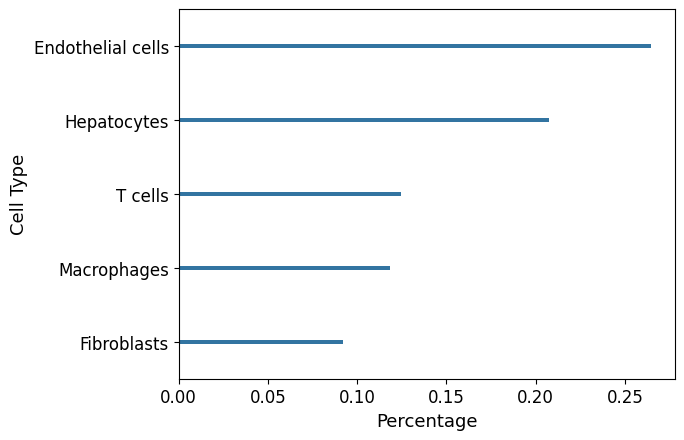

<Figure size 1000x200 with 0 Axes>

values: lung, Female, Cartilage of segmental bronchus, sc_transcriptomics, azimuth
lung, Female, Cartilage of segmental bronchus, sc_transcriptomics, azimuth


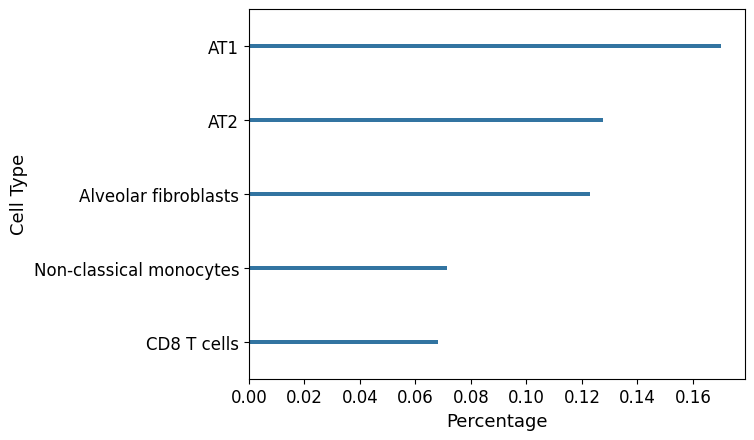

<Figure size 1000x200 with 0 Axes>

values: lung, Female, Lateral segmental bronchus, sc_transcriptomics, azimuth
lung, Female, Lateral segmental bronchus, sc_transcriptomics, azimuth


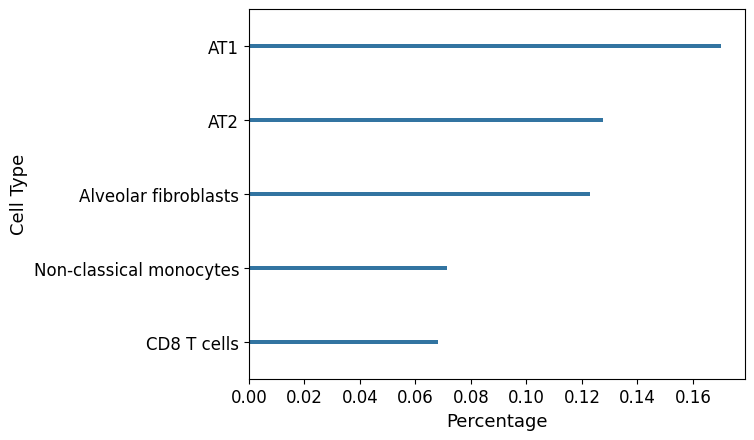

<Figure size 1000x200 with 0 Axes>

values: lung, Female, Right Posterior Basal Bronchopulmonary Segment, sc_proteomics, sc_proteomics
lung, Female, Right Posterior Basal Bronchopulmonary Segment, sc_proteomics, sc_proteomics


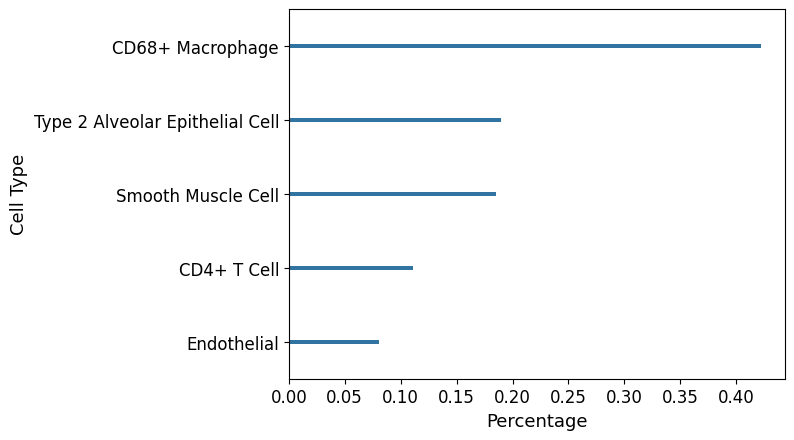

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Lateral segmental bronchus, sc_transcriptomics, azimuth
lung, Male, Lateral segmental bronchus, sc_transcriptomics, azimuth


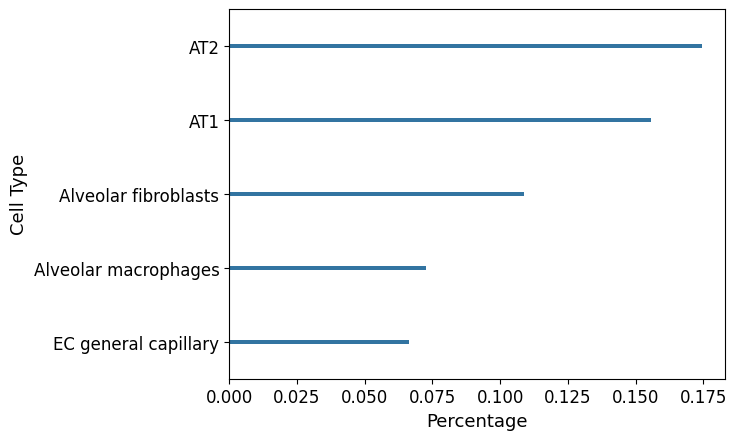

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Left Anterior Bronchopulmonary Segment, sc_transcriptomics, azimuth
lung, Male, Left Anterior Bronchopulmonary Segment, sc_transcriptomics, azimuth


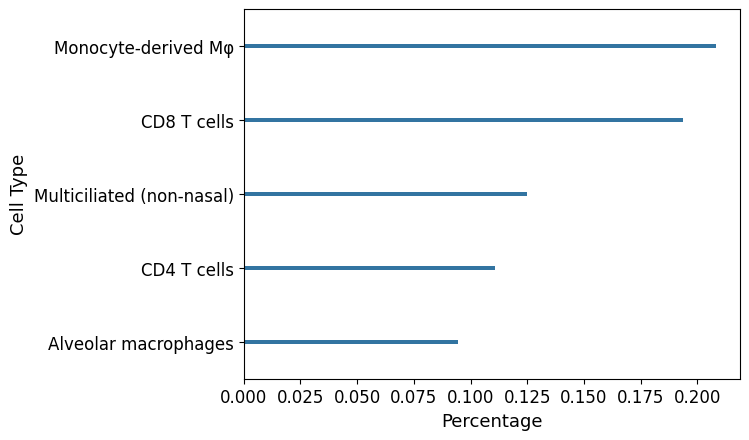

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Left Medial Basal Bronchopulmonary Segment, sc_transcriptomics, azimuth
lung, Male, Left Medial Basal Bronchopulmonary Segment, sc_transcriptomics, azimuth


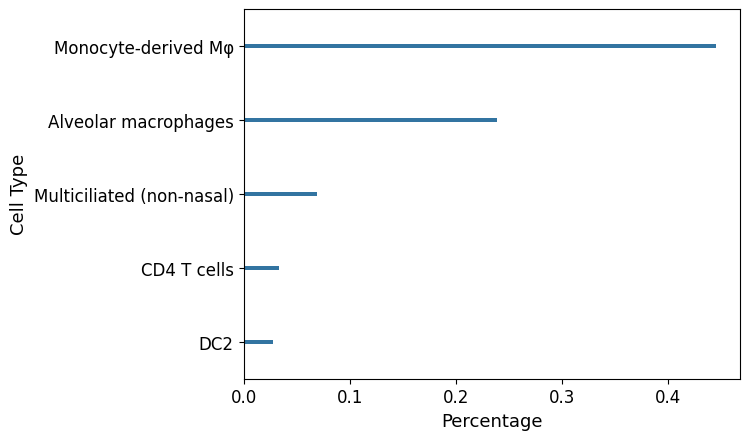

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Left anterior segmental bronchus, sc_transcriptomics, azimuth
lung, Male, Left anterior segmental bronchus, sc_transcriptomics, azimuth


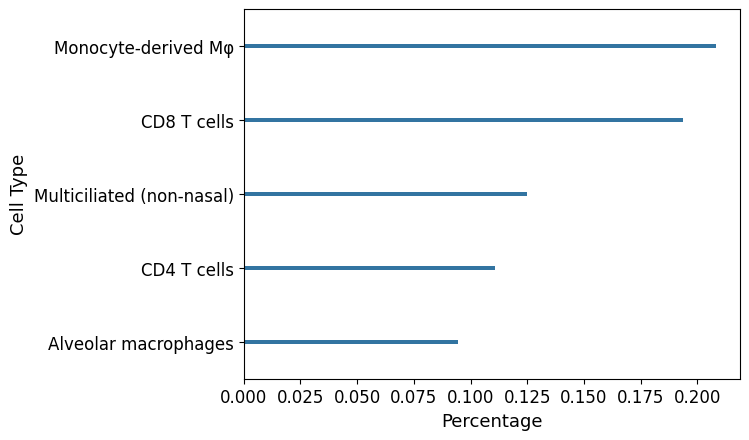

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Left apical bronchopulmonary segment, sc_transcriptomics, azimuth
lung, Male, Left apical bronchopulmonary segment, sc_transcriptomics, azimuth


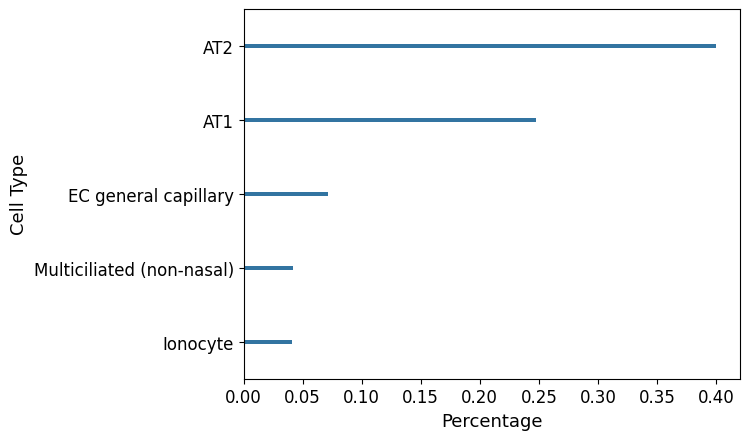

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Left apical segmental bronchus, sc_transcriptomics, azimuth
lung, Male, Left apical segmental bronchus, sc_transcriptomics, azimuth


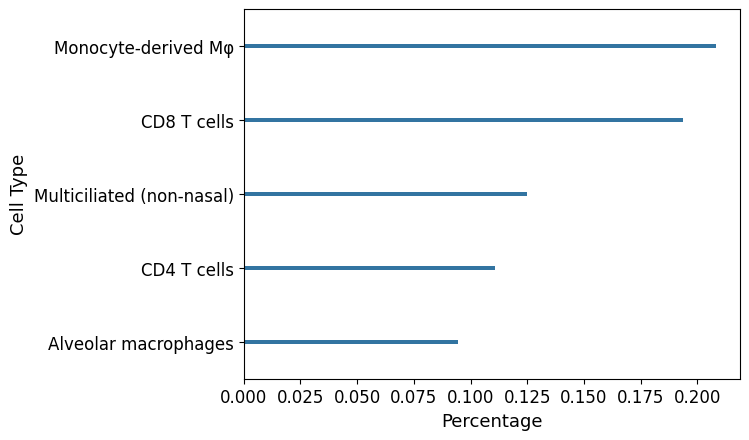

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Left lateral basal segmental bronchus, sc_transcriptomics, azimuth
lung, Male, Left lateral basal segmental bronchus, sc_transcriptomics, azimuth


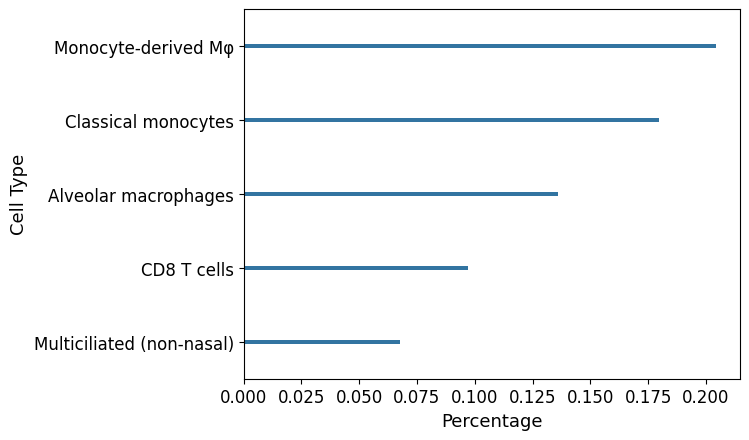

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Left medial basal segmental bronchus, sc_transcriptomics, azimuth
lung, Male, Left medial basal segmental bronchus, sc_transcriptomics, azimuth


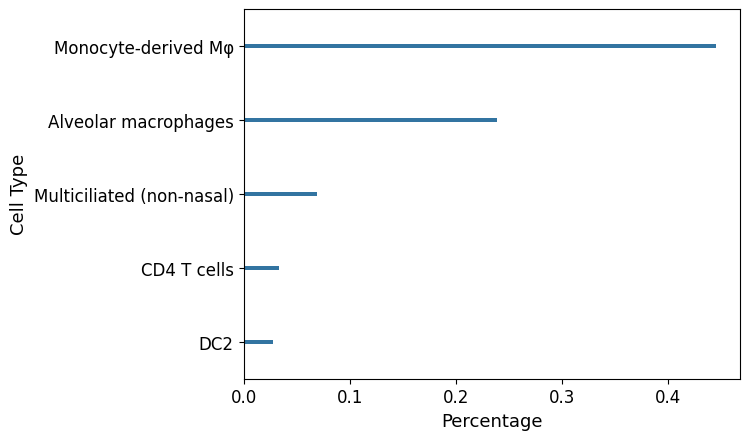

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Left posterior basal segmental bronchus, sc_proteomics, sc_proteomics
lung, Male, Left posterior basal segmental bronchus, sc_proteomics, sc_proteomics


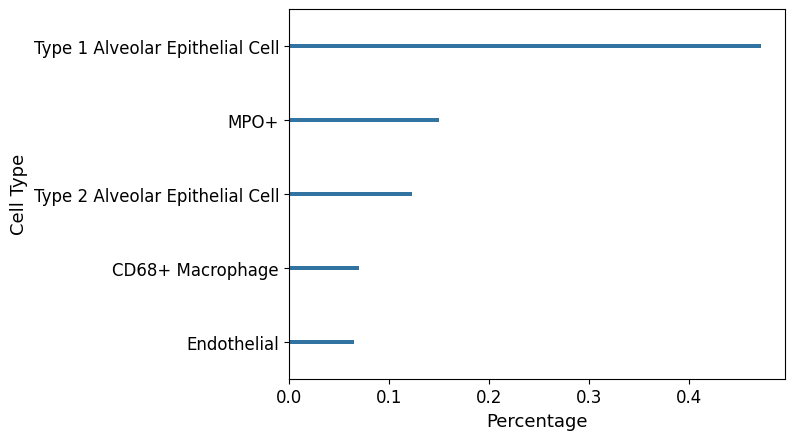

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Left posterior basal segmental bronchus, sc_transcriptomics, azimuth
lung, Male, Left posterior basal segmental bronchus, sc_transcriptomics, azimuth


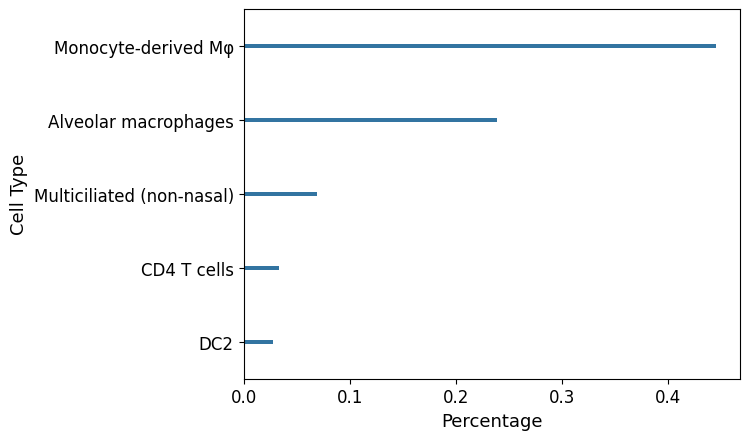

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Left posterior bronchopulmonary segment, sc_transcriptomics, azimuth
lung, Male, Left posterior bronchopulmonary segment, sc_transcriptomics, azimuth


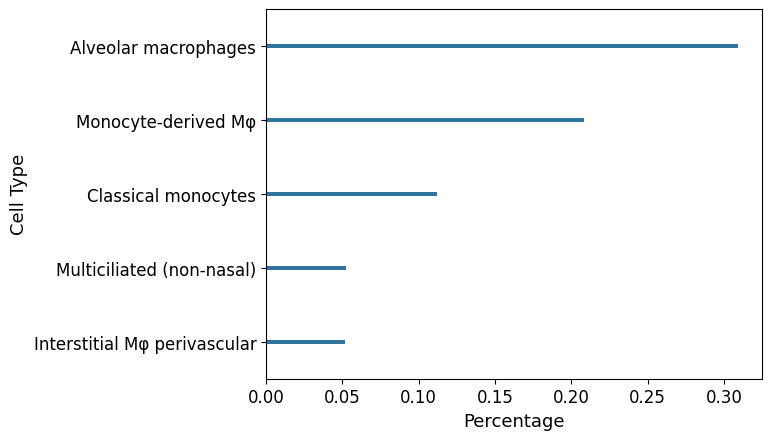

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Right Anterior Bronchopulmonary Segment, sc_transcriptomics, azimuth
lung, Male, Right Anterior Bronchopulmonary Segment, sc_transcriptomics, azimuth


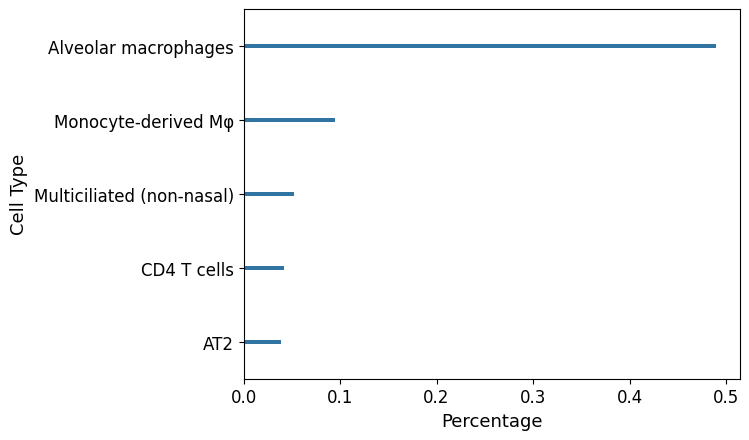

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Right Lateral Bronchopulmonary Segment, sc_transcriptomics, azimuth
lung, Male, Right Lateral Bronchopulmonary Segment, sc_transcriptomics, azimuth


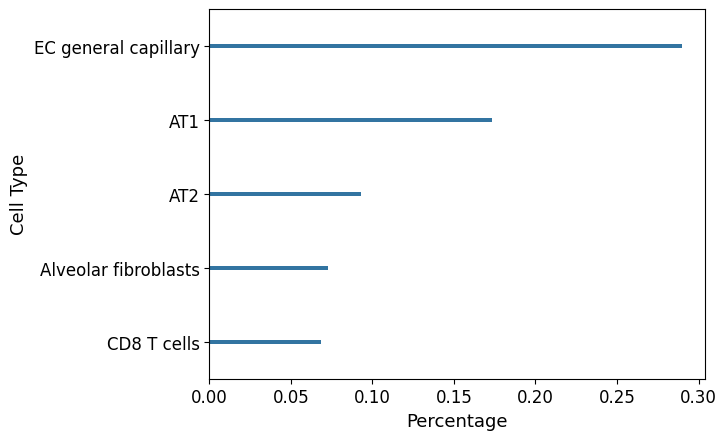

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Right Medial Bronchopulmonary Segment, sc_transcriptomics, azimuth
lung, Male, Right Medial Bronchopulmonary Segment, sc_transcriptomics, azimuth


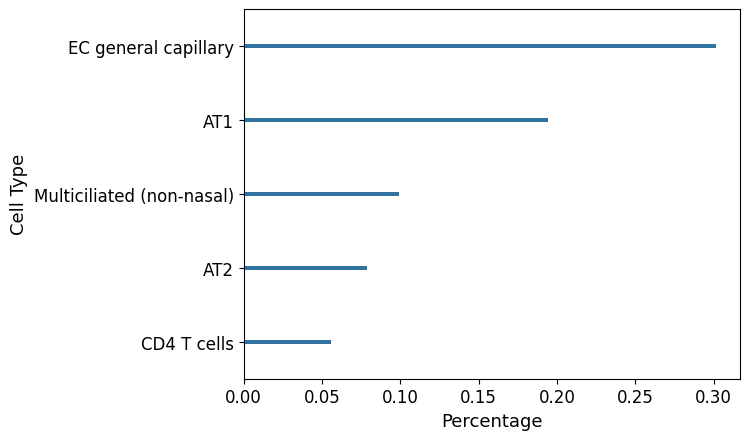

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Right Posterior Bronchopulmonary Segment, sc_transcriptomics, azimuth
lung, Male, Right Posterior Bronchopulmonary Segment, sc_transcriptomics, azimuth


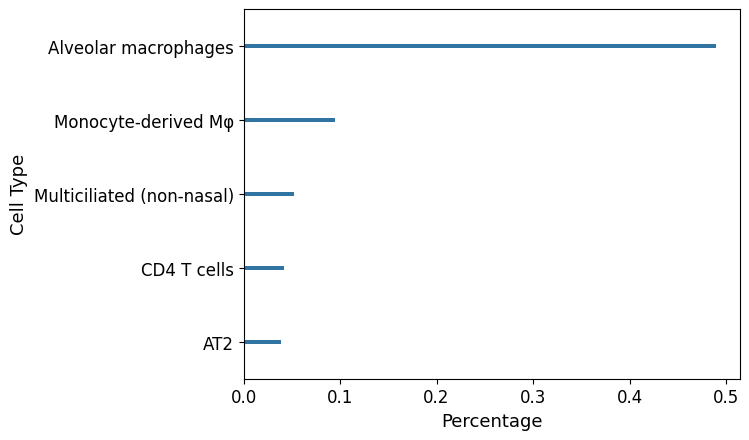

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Right anterior basal bronchopulmonary segment, sc_transcriptomics, azimuth
lung, Male, Right anterior basal bronchopulmonary segment, sc_transcriptomics, azimuth


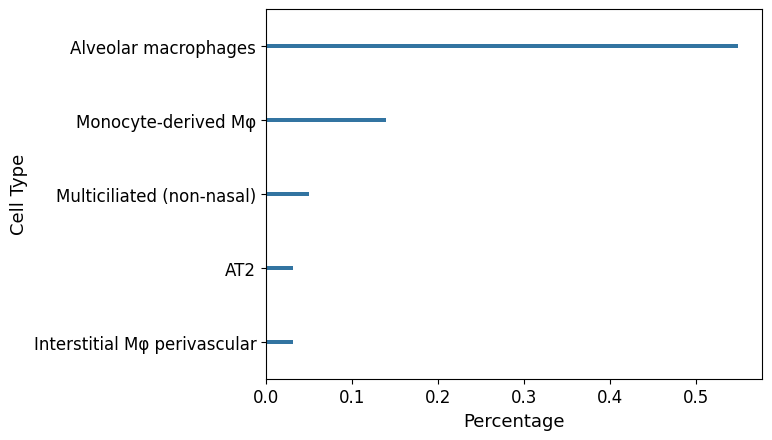

<Figure size 1000x200 with 0 Axes>

values: lung, Male, Right superior segmental bronchus, sc_transcriptomics, azimuth
lung, Male, Right superior segmental bronchus, sc_transcriptomics, azimuth


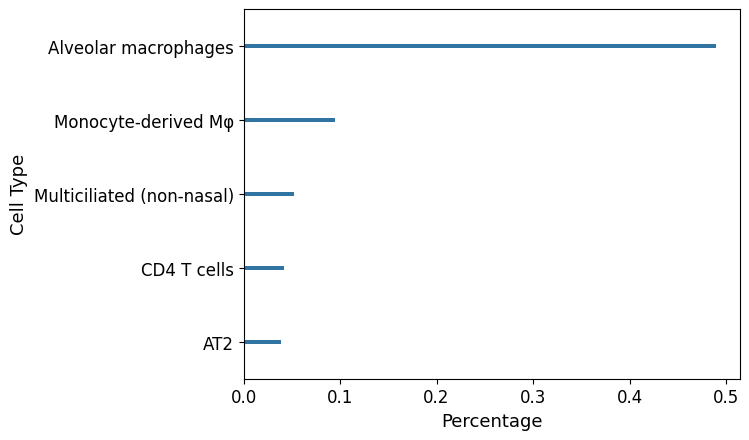

<Figure size 1000x200 with 0 Axes>

values: lung, Male, left Lateral Basal Bronchopulmonary Segment, sc_transcriptomics, azimuth
lung, Male, left Lateral Basal Bronchopulmonary Segment, sc_transcriptomics, azimuth


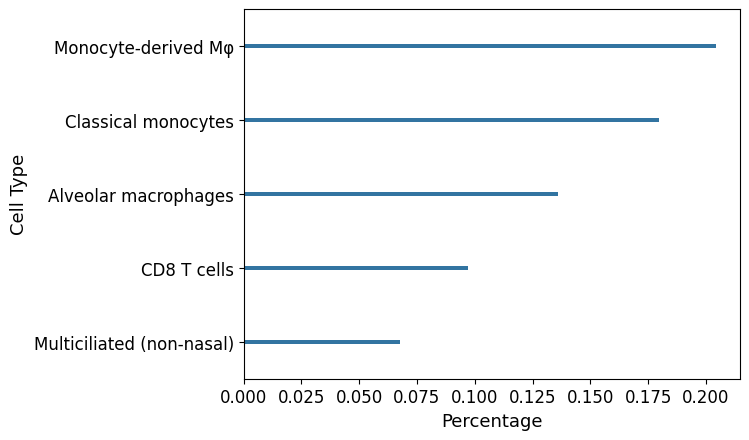

<Figure size 1000x200 with 0 Axes>

values: lung, Male, left anterior basal bronchopulmonary segment, sc_transcriptomics, azimuth
lung, Male, left anterior basal bronchopulmonary segment, sc_transcriptomics, azimuth


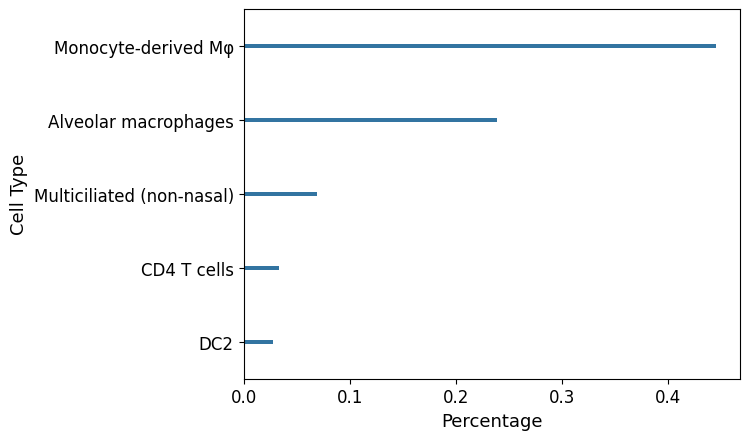

<Figure size 1000x200 with 0 Axes>

values: prostate, Male, central zone of prostate, sc_transcriptomics, popv
prostate, Male, central zone of prostate, sc_transcriptomics, popv


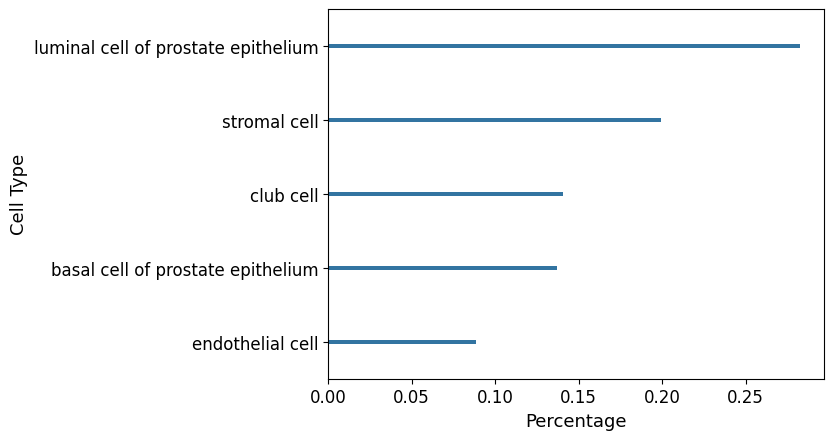

<Figure size 1000x200 with 0 Axes>

values: prostate, Male, peripheral zone of prostate, sc_transcriptomics, popv
prostate, Male, peripheral zone of prostate, sc_transcriptomics, popv


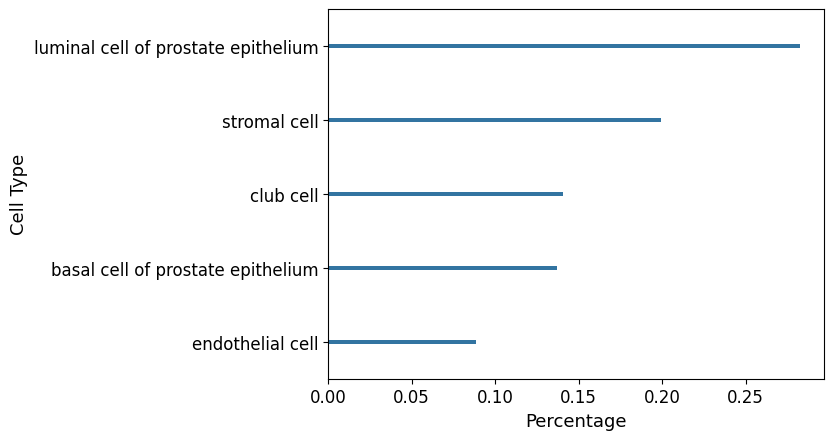

<Figure size 1000x200 with 0 Axes>

values: skin, Female, skin, sc_proteomics, sc_proteomics
skin, Female, skin, sc_proteomics, sc_proteomics


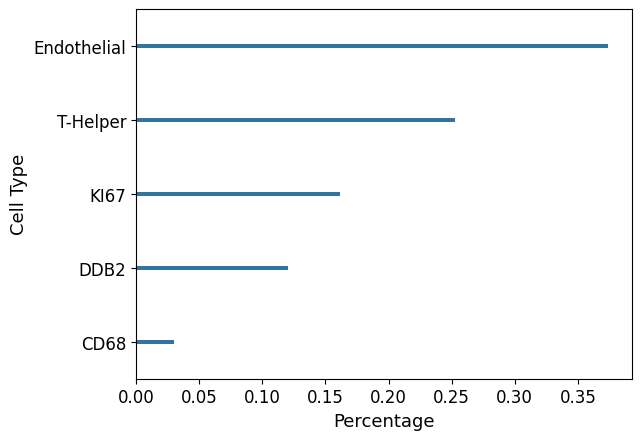

<Figure size 1000x200 with 0 Axes>

values: skin, Male, skin, sc_proteomics, sc_proteomics
skin, Male, skin, sc_proteomics, sc_proteomics


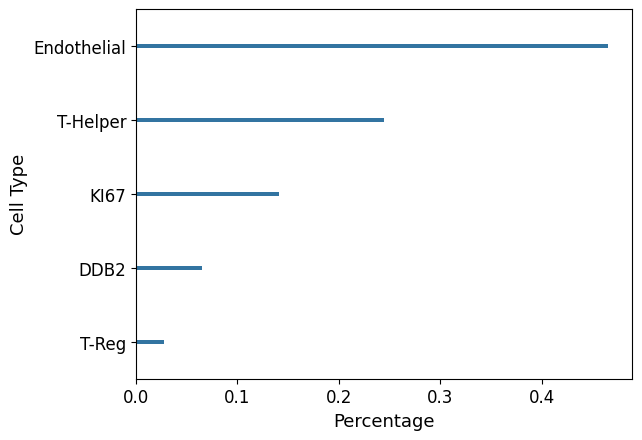

<Figure size 1000x200 with 0 Axes>

values: skin, Male, skin, sc_transcriptomics, celltypist
skin, Male, skin, sc_transcriptomics, celltypist


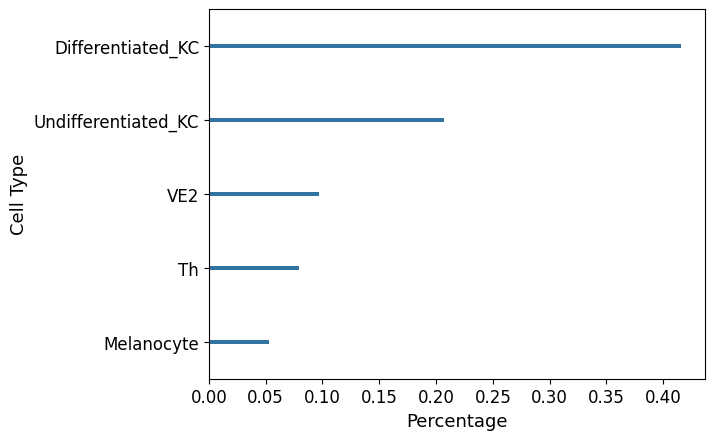

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, ascending part of duodenum, sc_proteomics, sc_proteomics
small intestine, Female, ascending part of duodenum, sc_proteomics, sc_proteomics


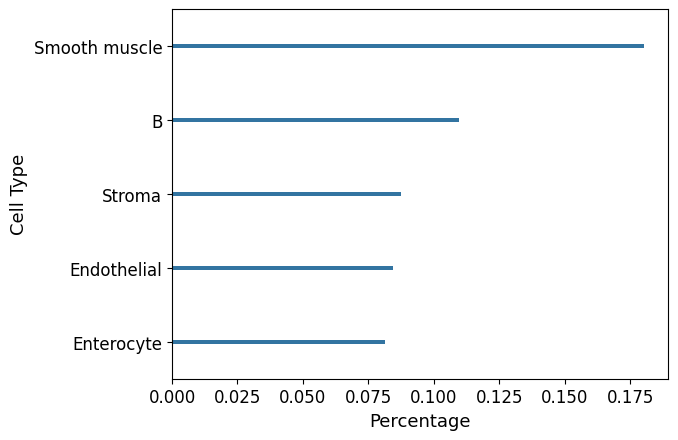

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, ascending part of duodenum, sc_transcriptomics, celltypist
small intestine, Female, ascending part of duodenum, sc_transcriptomics, celltypist


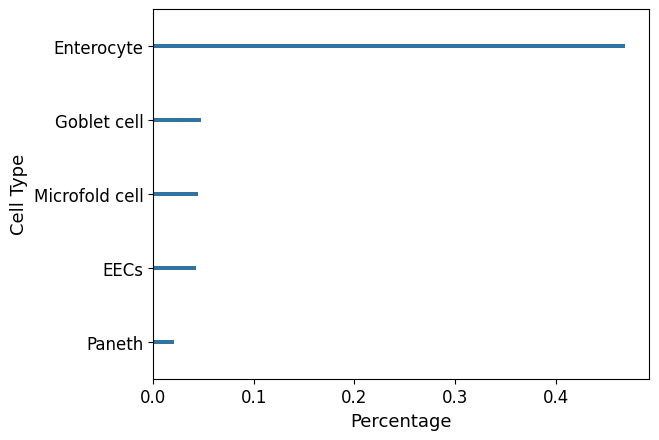

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, descending part of duodenum, sc_proteomics, sc_proteomics
small intestine, Female, descending part of duodenum, sc_proteomics, sc_proteomics


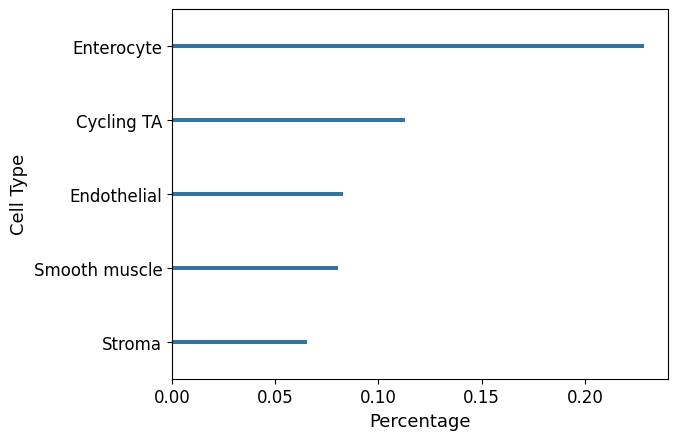

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, descending part of duodenum, sc_transcriptomics, celltypist
small intestine, Female, descending part of duodenum, sc_transcriptomics, celltypist


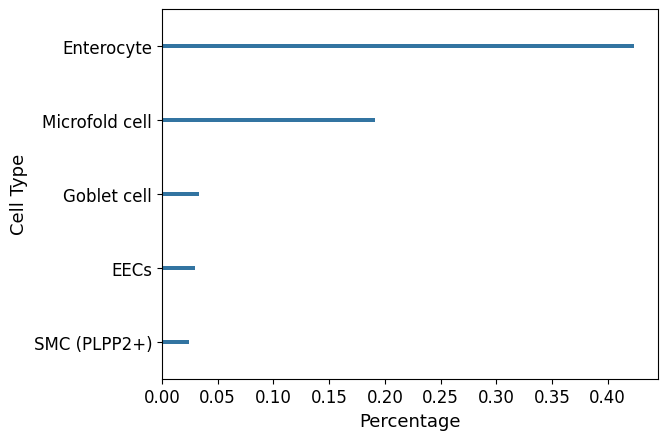

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, distal part of ileum, sc_proteomics, sc_proteomics
small intestine, Female, distal part of ileum, sc_proteomics, sc_proteomics


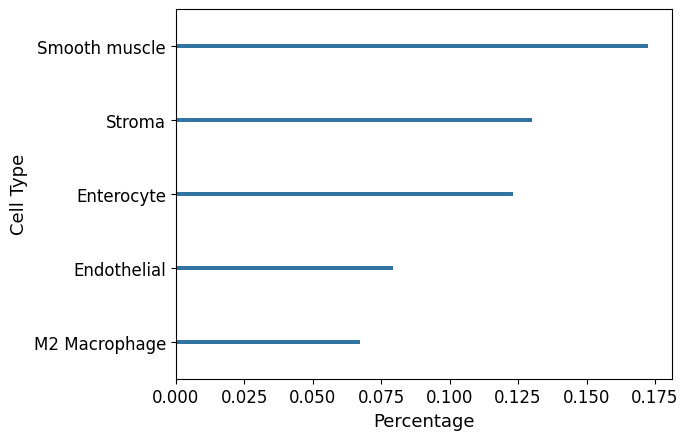

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, distal part of ileum, sc_transcriptomics, celltypist
small intestine, Female, distal part of ileum, sc_transcriptomics, celltypist


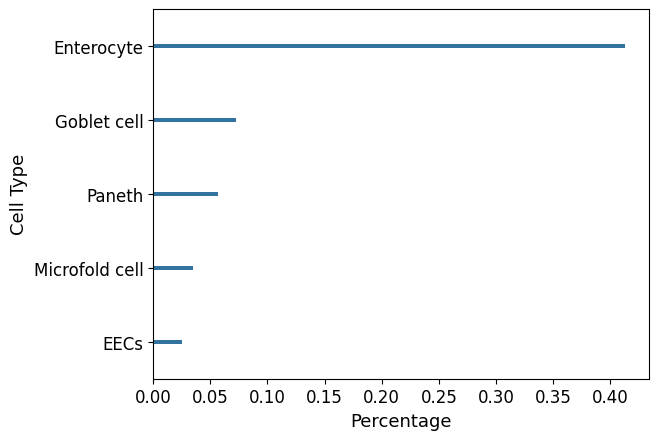

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, horizontal part of duodenum, sc_proteomics, sc_proteomics
small intestine, Female, horizontal part of duodenum, sc_proteomics, sc_proteomics


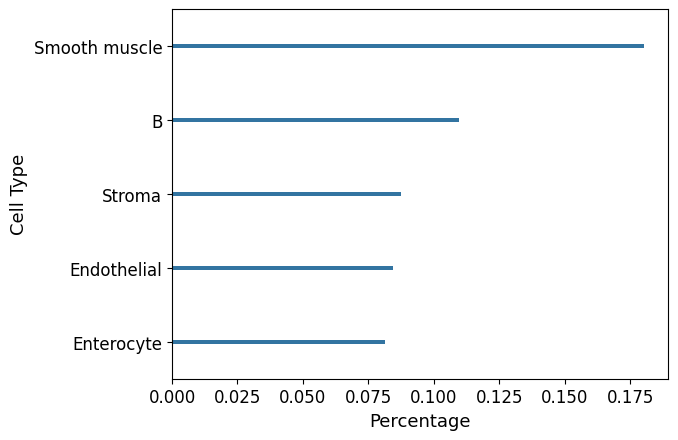

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, horizontal part of duodenum, sc_transcriptomics, celltypist
small intestine, Female, horizontal part of duodenum, sc_transcriptomics, celltypist


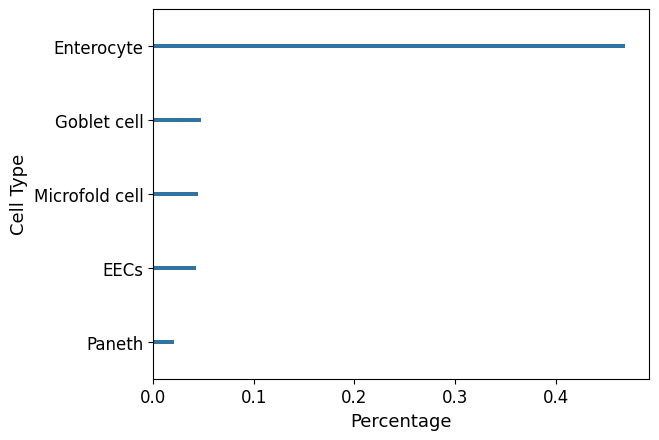

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, ileum, sc_proteomics, sc_proteomics
small intestine, Female, ileum, sc_proteomics, sc_proteomics


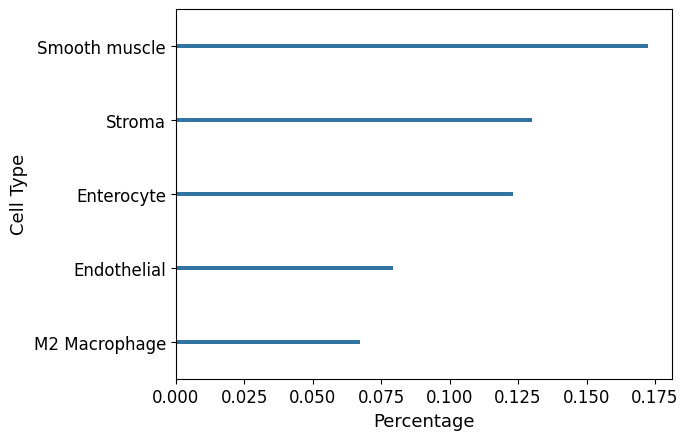

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, ileum, sc_transcriptomics, celltypist
small intestine, Female, ileum, sc_transcriptomics, celltypist


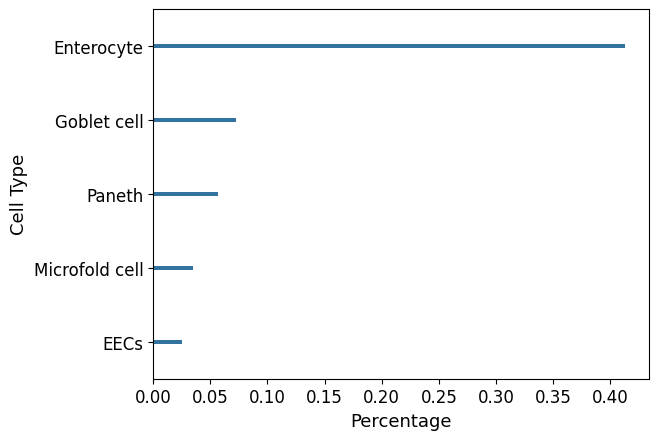

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, jejunum, sc_proteomics, sc_proteomics
small intestine, Female, jejunum, sc_proteomics, sc_proteomics


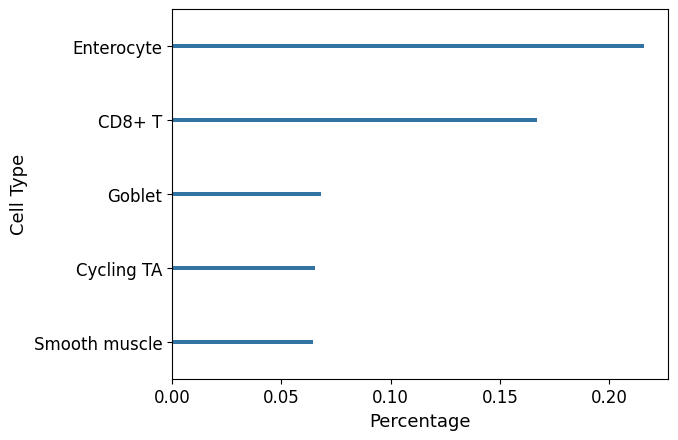

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, jejunum, sc_transcriptomics, celltypist
small intestine, Female, jejunum, sc_transcriptomics, celltypist


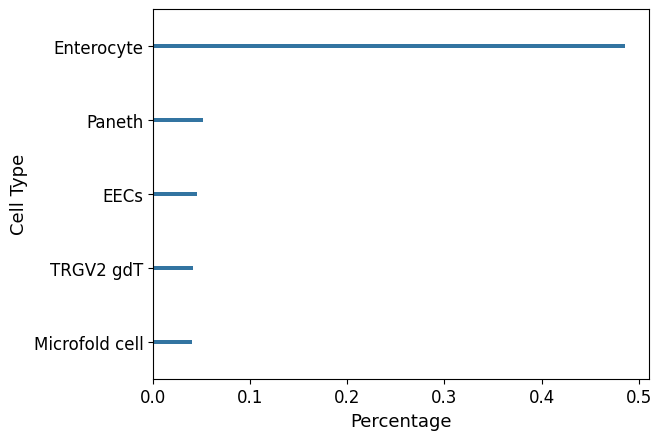

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, superior part of duodenum, sc_proteomics, sc_proteomics
small intestine, Female, superior part of duodenum, sc_proteomics, sc_proteomics


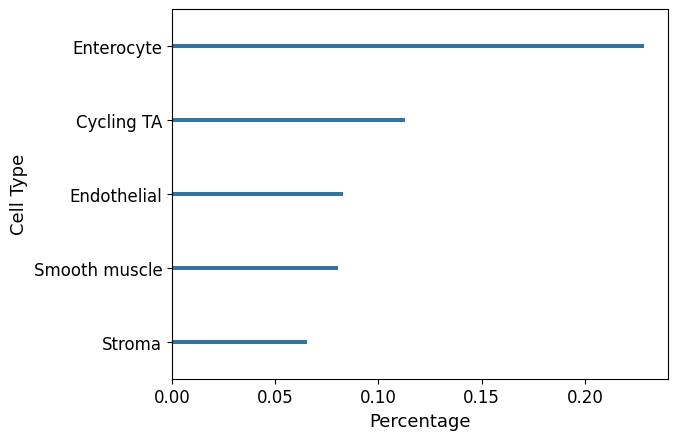

<Figure size 1000x200 with 0 Axes>

values: small intestine, Female, superior part of duodenum, sc_transcriptomics, celltypist
small intestine, Female, superior part of duodenum, sc_transcriptomics, celltypist


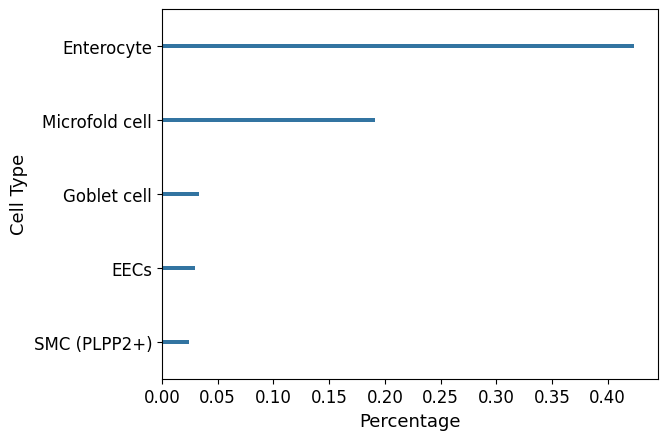

<Figure size 1000x200 with 0 Axes>

values: small intestine, Male, ascending part of duodenum, sc_proteomics, sc_proteomics
small intestine, Male, ascending part of duodenum, sc_proteomics, sc_proteomics


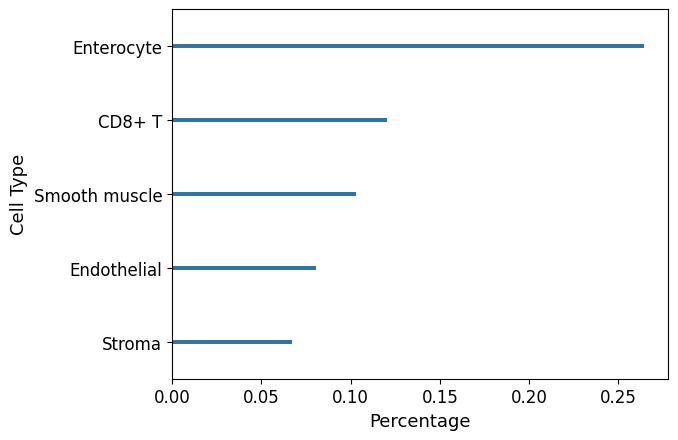

<Figure size 1000x200 with 0 Axes>

values: small intestine, Male, ascending part of duodenum, sc_transcriptomics, celltypist
small intestine, Male, ascending part of duodenum, sc_transcriptomics, celltypist


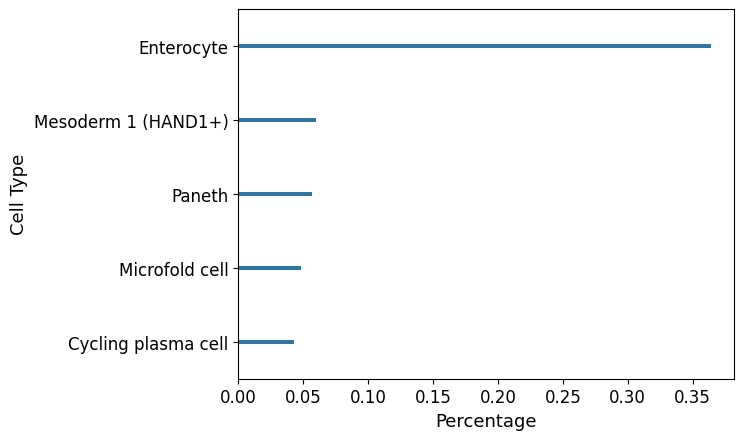

<Figure size 1000x200 with 0 Axes>

values: small intestine, Male, descending part of duodenum, sc_proteomics, sc_proteomics
small intestine, Male, descending part of duodenum, sc_proteomics, sc_proteomics


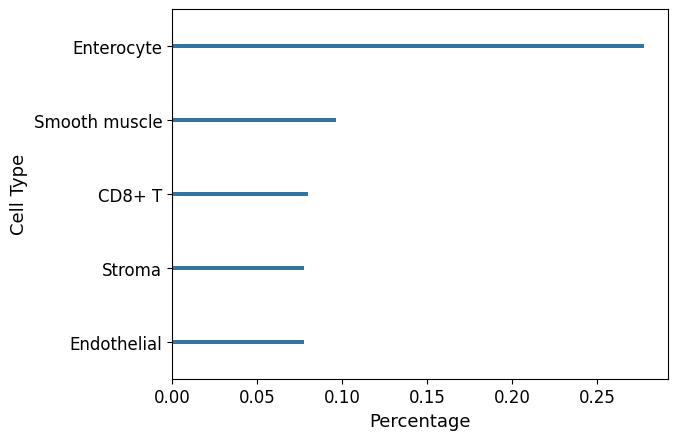

<Figure size 1000x200 with 0 Axes>

values: small intestine, Male, descending part of duodenum, sc_transcriptomics, celltypist
small intestine, Male, descending part of duodenum, sc_transcriptomics, celltypist


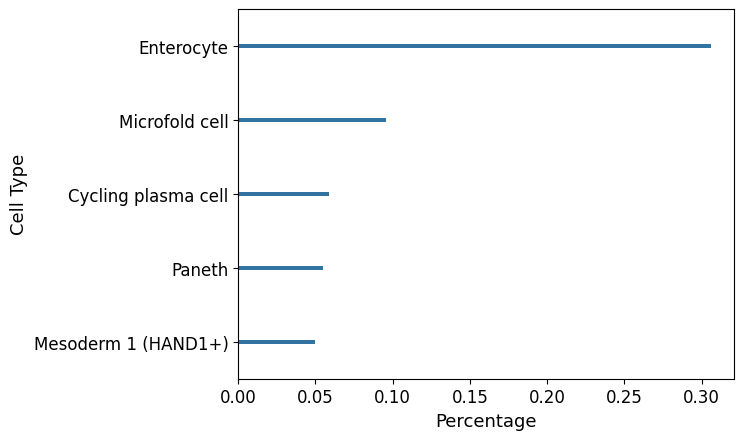

<Figure size 1000x200 with 0 Axes>

values: small intestine, Male, distal part of ileum, sc_proteomics, sc_proteomics
small intestine, Male, distal part of ileum, sc_proteomics, sc_proteomics


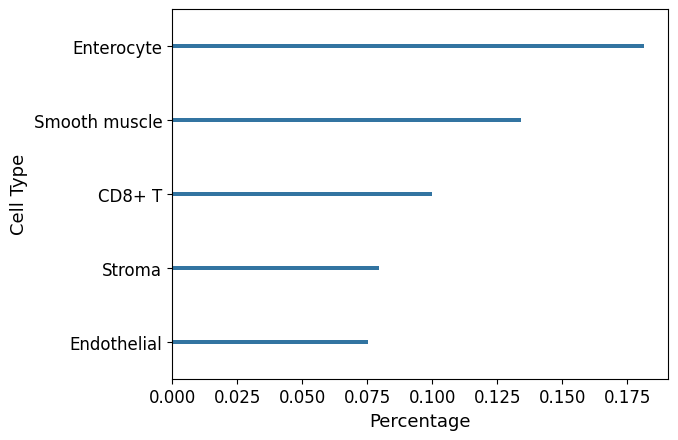

<Figure size 1000x200 with 0 Axes>

values: small intestine, Male, distal part of ileum, sc_transcriptomics, celltypist
small intestine, Male, distal part of ileum, sc_transcriptomics, celltypist


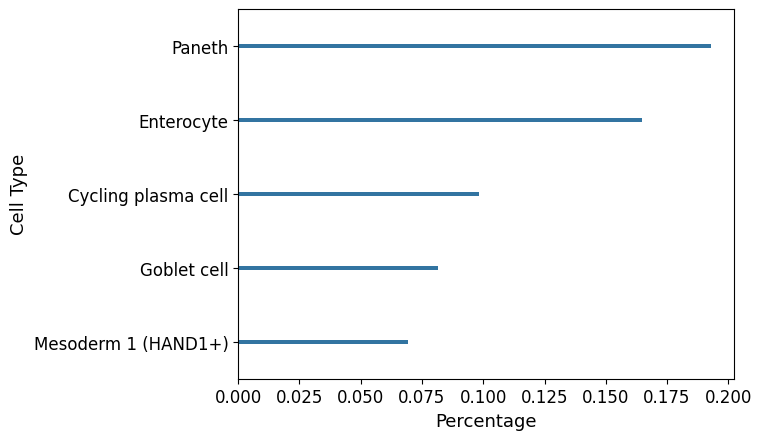

<Figure size 1000x200 with 0 Axes>

values: small intestine, Male, horizontal part of duodenum, sc_proteomics, sc_proteomics
small intestine, Male, horizontal part of duodenum, sc_proteomics, sc_proteomics


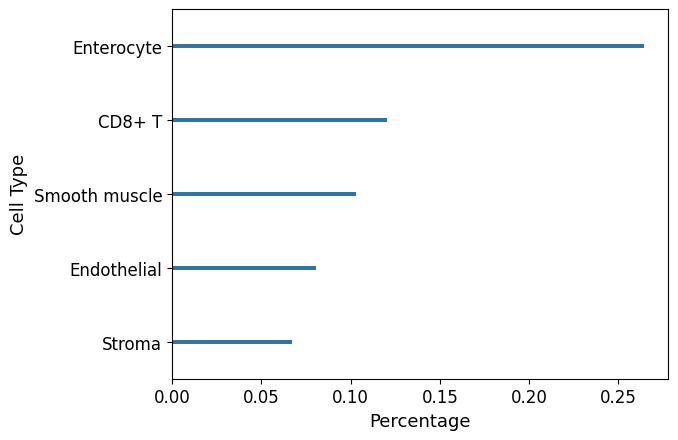

<Figure size 1000x200 with 0 Axes>

values: small intestine, Male, horizontal part of duodenum, sc_transcriptomics, celltypist
small intestine, Male, horizontal part of duodenum, sc_transcriptomics, celltypist


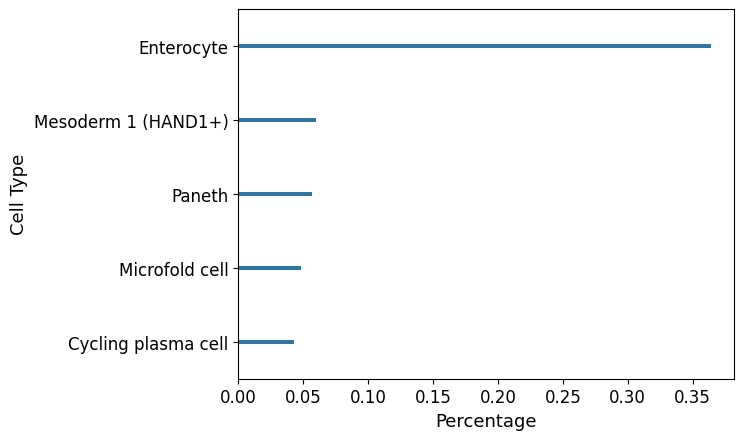

<Figure size 1000x200 with 0 Axes>

values: small intestine, Male, jejunum, sc_proteomics, sc_proteomics
small intestine, Male, jejunum, sc_proteomics, sc_proteomics


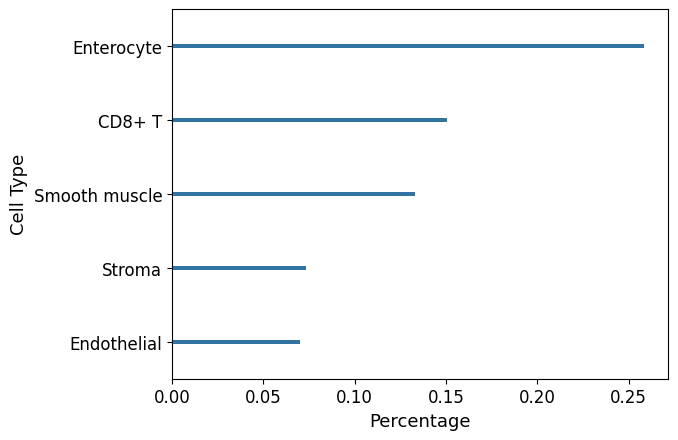

<Figure size 1000x200 with 0 Axes>

values: small intestine, Male, jejunum, sc_transcriptomics, celltypist
small intestine, Male, jejunum, sc_transcriptomics, celltypist


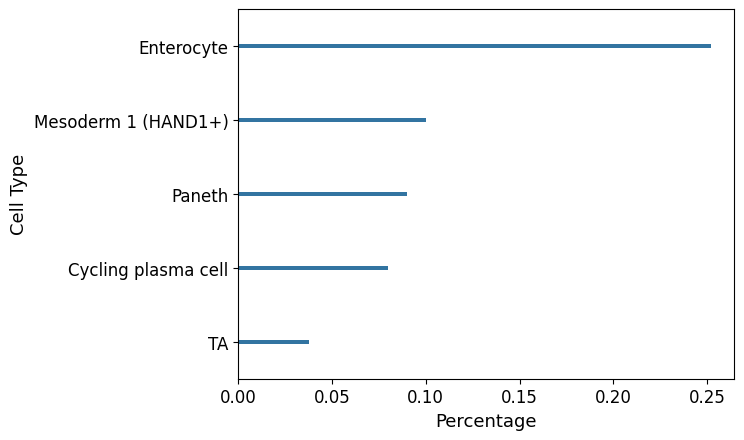

<Figure size 1000x200 with 0 Axes>

values: spleen, Female, diaphragmatic surface of spleen, sc_proteomics, sc_proteomics
spleen, Female, diaphragmatic surface of spleen, sc_proteomics, sc_proteomics


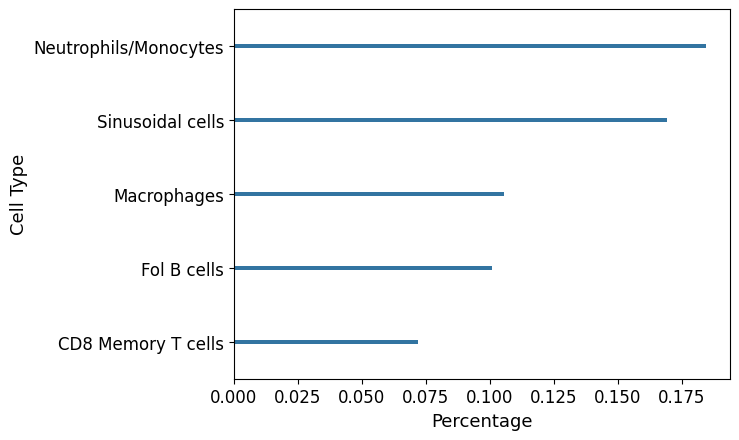

<Figure size 1000x200 with 0 Axes>

values: spleen, Female, diaphragmatic surface of spleen, sc_transcriptomics, popv
spleen, Female, diaphragmatic surface of spleen, sc_transcriptomics, popv


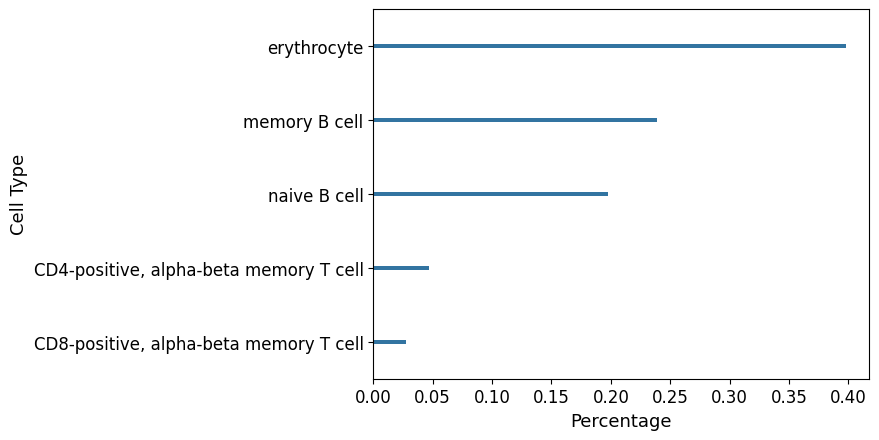

<Figure size 1000x200 with 0 Axes>

values: spleen, Female, hilum of spleen, sc_proteomics, sc_proteomics
spleen, Female, hilum of spleen, sc_proteomics, sc_proteomics


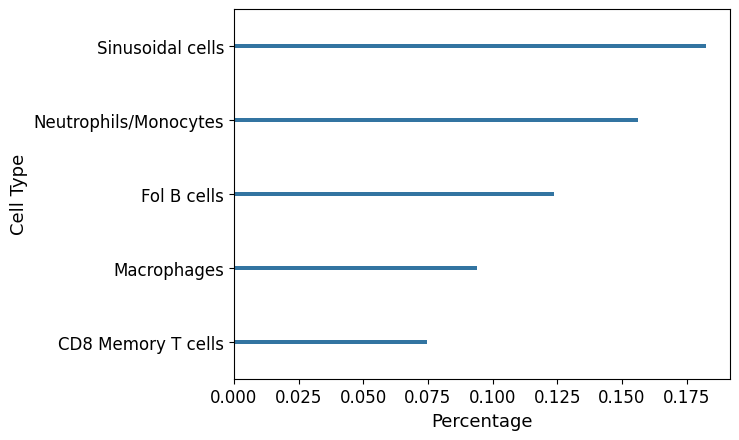

<Figure size 1000x200 with 0 Axes>

values: spleen, Female, hilum of spleen, sc_transcriptomics, popv
spleen, Female, hilum of spleen, sc_transcriptomics, popv


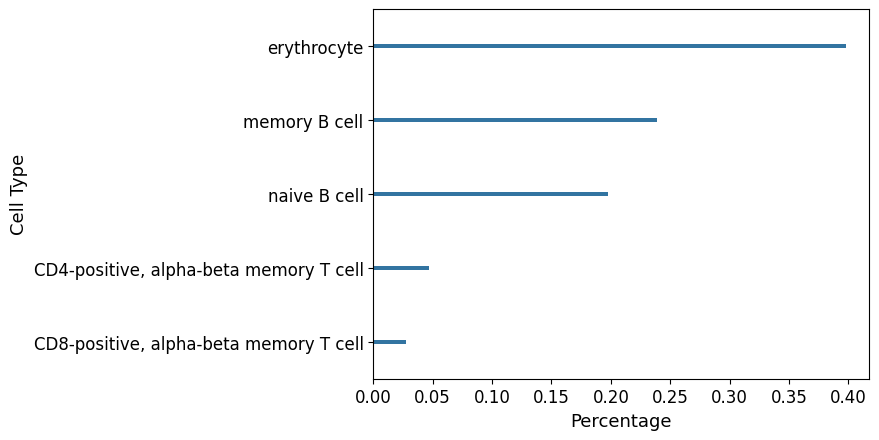

<Figure size 1000x200 with 0 Axes>

values: spleen, Male, diaphragmatic surface of spleen, sc_proteomics, sc_proteomics
spleen, Male, diaphragmatic surface of spleen, sc_proteomics, sc_proteomics


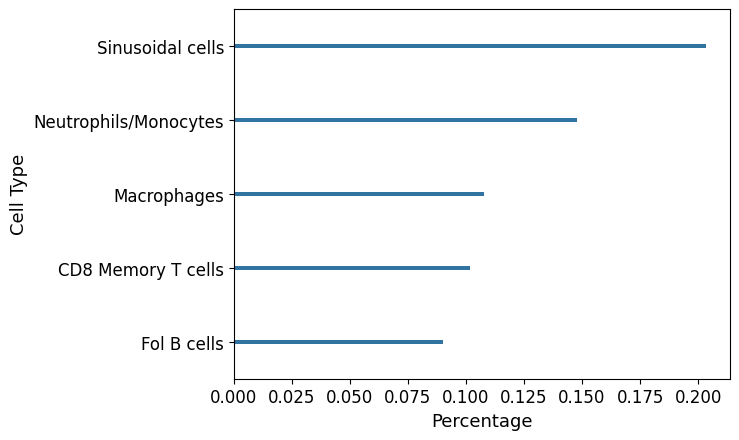

<Figure size 1000x200 with 0 Axes>

values: spleen, Male, diaphragmatic surface of spleen, sc_transcriptomics, popv
spleen, Male, diaphragmatic surface of spleen, sc_transcriptomics, popv


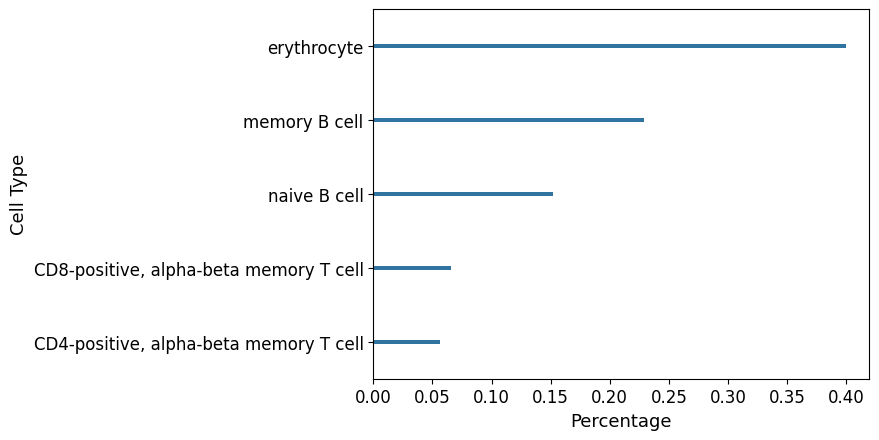

<Figure size 1000x200 with 0 Axes>

values: spleen, Male, hilum of spleen, sc_proteomics, sc_proteomics
spleen, Male, hilum of spleen, sc_proteomics, sc_proteomics


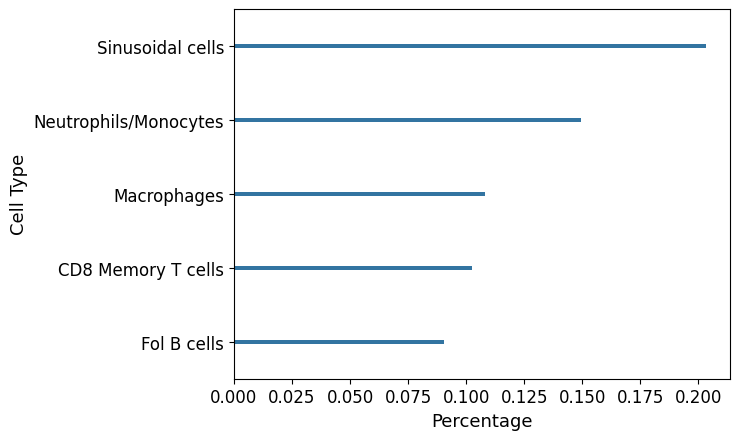

<Figure size 1000x200 with 0 Axes>

values: spleen, Male, hilum of spleen, sc_transcriptomics, popv
spleen, Male, hilum of spleen, sc_transcriptomics, popv


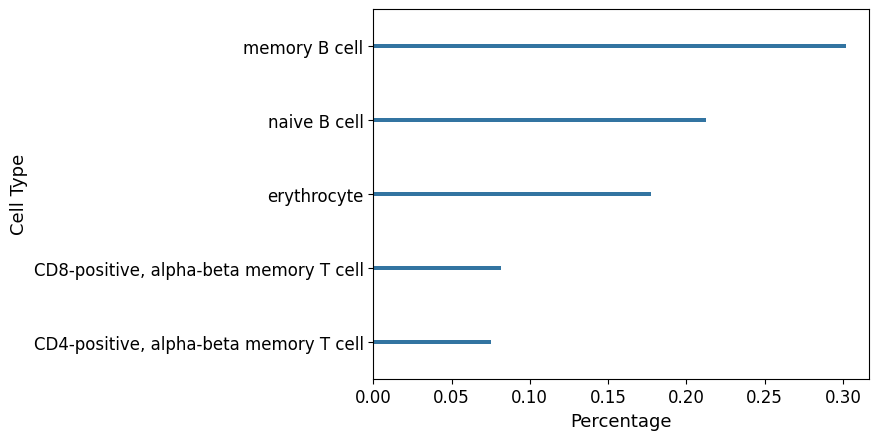

<Figure size 1000x200 with 0 Axes>

values: spleen, Male, renal surface of spleen, sc_proteomics, sc_proteomics
spleen, Male, renal surface of spleen, sc_proteomics, sc_proteomics


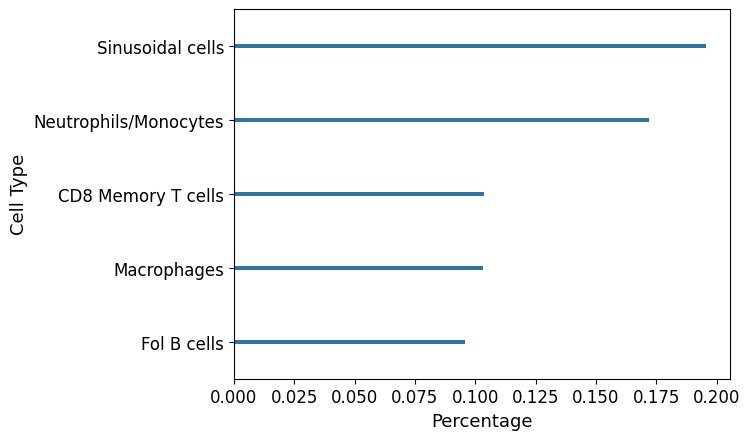

<Figure size 1000x200 with 0 Axes>

values: urinary bladder, Female, fundus of urinary bladder, sc_transcriptomics, popv
urinary bladder, Female, fundus of urinary bladder, sc_transcriptomics, popv


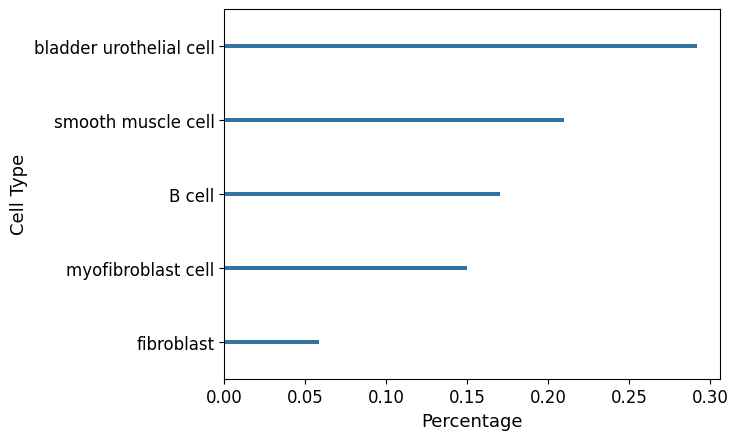

<Figure size 1000x200 with 0 Axes>

values: urinary bladder, Male, fundus of urinary bladder, sc_transcriptomics, popv
urinary bladder, Male, fundus of urinary bladder, sc_transcriptomics, popv


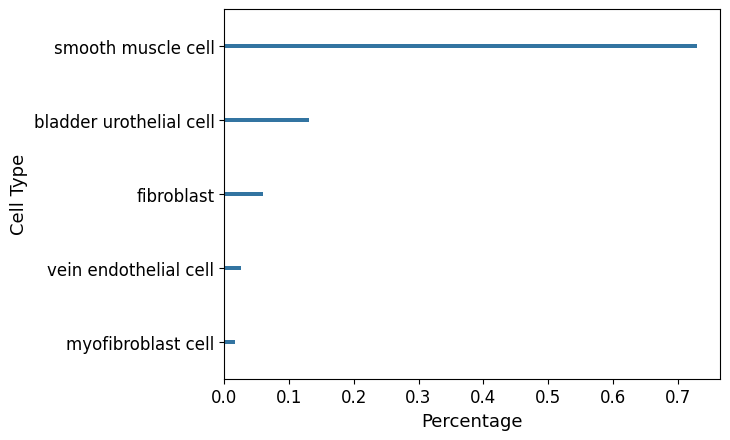

<Figure size 1000x200 with 0 Axes>

values: urinary bladder, Male, trigone of urinary bladder, sc_transcriptomics, popv
urinary bladder, Male, trigone of urinary bladder, sc_transcriptomics, popv


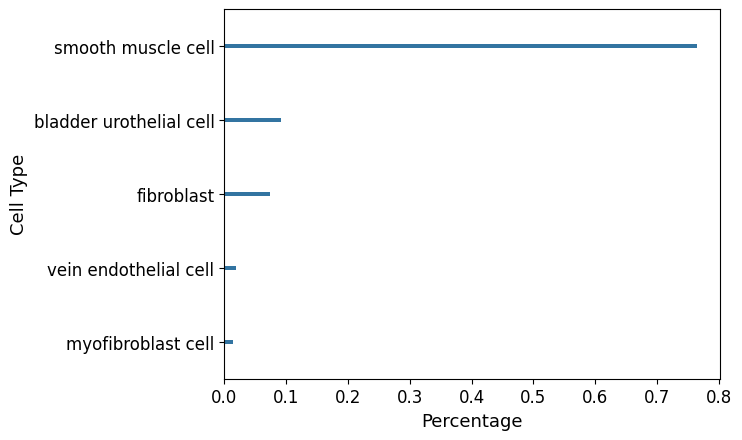

<Figure size 1000x200 with 0 Axes>

In [ ]:
for index, row in unique_combinations.iterrows():
  print(
      f'values: {row['organ']}, {row['sex']}, {row['as_label']}, {row['modality']}, {row['tool']}')
  if True:
    build_separate_bar_graphs(df_filtered, row['organ'],row['sex'], row['as_label'], row['modality'], row['tool'])

## Make look-up for `as_label` to `node_name`

In [ ]:
url = 'https://cdn.humanatlas.io/digital-objects/ref-organ/asct-b-3d-models-crosswalk/v1.7/assets/asct-b-3d-models-crosswalk.csv'
df_crosswalk = pd.read_csv(url, skiprows=10)
df_crosswalk

anatomical_structure_of source_spatial_entity                  node_name  \
0                          -       #VHFemaleOrgans  VH_F_integumentary_system   
1               #VHFSkinV1.1       #VHFemaleOrgans                  VH_F_skin   
2                          -                     -         VH_F_mammary_gland   
3       #VHFLeftMammaryGland       #VHFemaleOrgans       VH_F_mammary_gland_L   
4       #VHFLeftMammaryGland       #VHFemaleOrgans                 VH_F_fat_L   
...                      ...                   ...                        ...   
2108           #VHMVertebrae         #VHMaleOrgans     VH_M_lumbar_vertebra_1   
2109           #VHMVertebrae         #VHMaleOrgans     VH_M_lumbar_vertebra_2   
2110           #VHMVertebrae         #VHMaleOrgans     VH_M_lumbar_vertebra_3   
2111           #VHMVertebrae         #VHMaleOrgans     VH_M_lumbar_vertebra_4   
2112           #VHMVertebrae         #VHMaleOrgans     VH_M_lumbar_vertebra_5   

                                                label      OntologyID  \
0                          integumentary system layer  UBERON:0013754   
1                                        skin of body  UBERON:0002097   
2                                                   -               -   
3                                  Left mammary gland       FMA:57991   
4     Interlobar adipose tissue of left mammary gland       FMA:73166   
...                                               ...             ...   
2108                                lumbar vertebra 1  UBERON:0004617   
2109                                lumbar vertebra 2  UBERON:0004618   
2110                                lumbar vertebra 3  UBERON:0004619   
2111                                lumbar vertebra 4  UBERON:0004620   
2112                                lumbar vertebra 5  UBERON:0004621   

                                  representation_of       node_type  \
0     http://purl.obolibrary.org/obo/UBERON_0013754  organizational   
1     http://purl.obolibrary.org/obo/UBERON_0002097            mesh   
2                                                 -  organizational   
3              http://purl.org/sig/ont/fma/fma57991  organizational   
4              http://purl.org/sig/ont/fma/fma73166            mesh   
...                                             ...             ...   
2108  http://purl.obolibrary.org/obo/UBERON_0004617            mesh   
2109  http://purl.obolibrary.org/obo/UBERON_0004618            mesh   
2110  http://purl.obolibrary.org/obo/UBERON_0004619            mesh   
2111  http://purl.obolibrary.org/obo/UBERON_0004620            mesh   
2112  http://purl.obolibrary.org/obo/UBERON_0004621            mesh   

     glb file of single organs Ref/1 Ref/1/ID  
0               3d-vh-f-united   NaN      NaN  
1                 3d-vh-f-skin   NaN      NaN  
2                            -   NaN      NaN  
3      3d-vh-f-mammary-gland-l   NaN      NaN  
4      3d-vh-f-mammary-gland-l   NaN      NaN  
...                        ...   ...      ...  
2108            VH_M_Vertebrae   NaN      NaN  
2109            VH_M_Vertebrae   NaN      NaN  
2110            VH_M_Vertebrae   NaN      NaN  
2111            VH_M_Vertebrae   NaN      NaN  
2112            VH_M_Vertebrae   NaN      NaN  

[2113 rows x 10 columns]

In [ ]:
# only keep relevant rows
df_filtered

organ                                             as  \
2068      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
2070      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
2072      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
2074      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
2076      Left kidney  http://purl.obolibrary.org/obo/UBERON_0008716   
...               ...                                            ...   
4270  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
4271  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
4272  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
4273  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
4274  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   

                        as_label     sex     tool            modality  \
2068             hilum of kidney  Female  azimuth  sc_transcriptomics   
2070             hilum of kidney  Female  azimuth  sc_transcriptomics   
2072             hilum of kidney  Female  azimuth  sc_transcriptomics   
2074             hilum of kidney  Female  azimuth  sc_transcriptomics   
2076             hilum of kidney  Female  azimuth  sc_transcriptomics   
...                          ...     ...      ...                 ...   
4270  trigone of urinary bladder    Male     popv  sc_transcriptomics   
4271  trigone of urinary bladder    Male     popv  sc_transcriptomics   
4272  trigone of urinary bladder    Male     popv  sc_transcriptomics   
4273  trigone of urinary bladder    Male     popv  sc_transcriptomics   
4274  trigone of urinary bladder    Male     popv  sc_transcriptomics   

                                        cell_id  \
2068  http://purl.obolibrary.org/obo/CL_4030022   
2070  http://purl.obolibrary.org/obo/CL_1000718   
2072  http://purl.obolibrary.org/obo/CL_1000692   
2074  http://purl.obolibrary.org/obo/CL_1000597   
2076  http://purl.obolibrary.org/obo/CL_1000768   
...                                         ...   
4270  http://purl.obolibrary.org/obo/CL_0000814   
4271  http://purl.obolibrary.org/obo/CL_0002138   
4272  http://purl.obolibrary.org/obo/CL_0000236   
4273  http://purl.obolibrary.org/obo/CL_0000084   
4274  http://purl.obolibrary.org/obo/CL_0000786   

                                cell_label  cell_count  cell_percentage  \
2068                  Medullary Fibroblast    1832.421         0.274784   
2070       Inner Medullary Collecting Duct    1146.533         0.171930   
2072                            Fibroblast     876.037         0.131368   
2074              Papillary Tip Epithelial     749.843         0.112444   
2076                     Connecting Tubule     315.994         0.047385   
...                                    ...         ...              ...   
4270                      mature NK T cell      53.168         0.001612   
4271  endothelial cell of lymphatic vessel      52.639         0.001596   
4272                                B cell      20.586         0.000624   
4273                                T cell      10.935         0.000332   
4274                           plasma cell       1.699         0.000052   

      dataset_count                            level_1_cell_id  \
2068              2  http://purl.obolibrary.org/obo/CL_0000057   
2070              2  http://purl.obolibrary.org/obo/CL_0000066   
2072              2  http://purl.obolibrary.org/obo/CL_0000057   
2074              2  http://purl.obolibrary.org/obo/CL_0000000   
2076              2  http://purl.obolibrary.org/obo/CL_0000066   
...             ...                                        ...   
4270              4  http://purl.obolibrary.org/obo/CL_0000084   
4271              4  http://purl.obolibrary.org/obo/CL_0000000   
4272              4  http://purl.obolibrary.org/obo/CL_0000236   
4273              4  http://purl.obolibrary.org/obo/CL_0000084   
4274              4  http://purl.o

In [ ]:
# export relevant columns
subset = df_crosswalk[['label', 'node_name', 'anatomical_structure_of']]
export = subset[subset['label'].isin(df_filtered['as_label'])]
export.to_csv('output/ctBar3dAs/crosswalk.csv', index=False)